In [113]:
!pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable


In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Name of Dataset : Water Quality

**CONTEXT**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Source :** https://www.kaggle.com/datasets/adityakadiwal/water-potability


![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/Inforgraphic_2.png)

In [115]:
dataframed = pd.read_csv('water_potability.csv');
dataframed.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# The Dataset consists of the following :
* 3276 rows
* 10 columns

![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_3.png)

In [116]:
print('Shape of the Dataset =', dataframed.shape)

Shape of the Dataset = (3276, 10)


# METADATA
**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_1.png)

In [117]:
dataframed.columns.values.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [118]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [119]:
dataframed.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [120]:
dataframed.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [121]:
dataframed.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Columns with missing values :

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

3. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

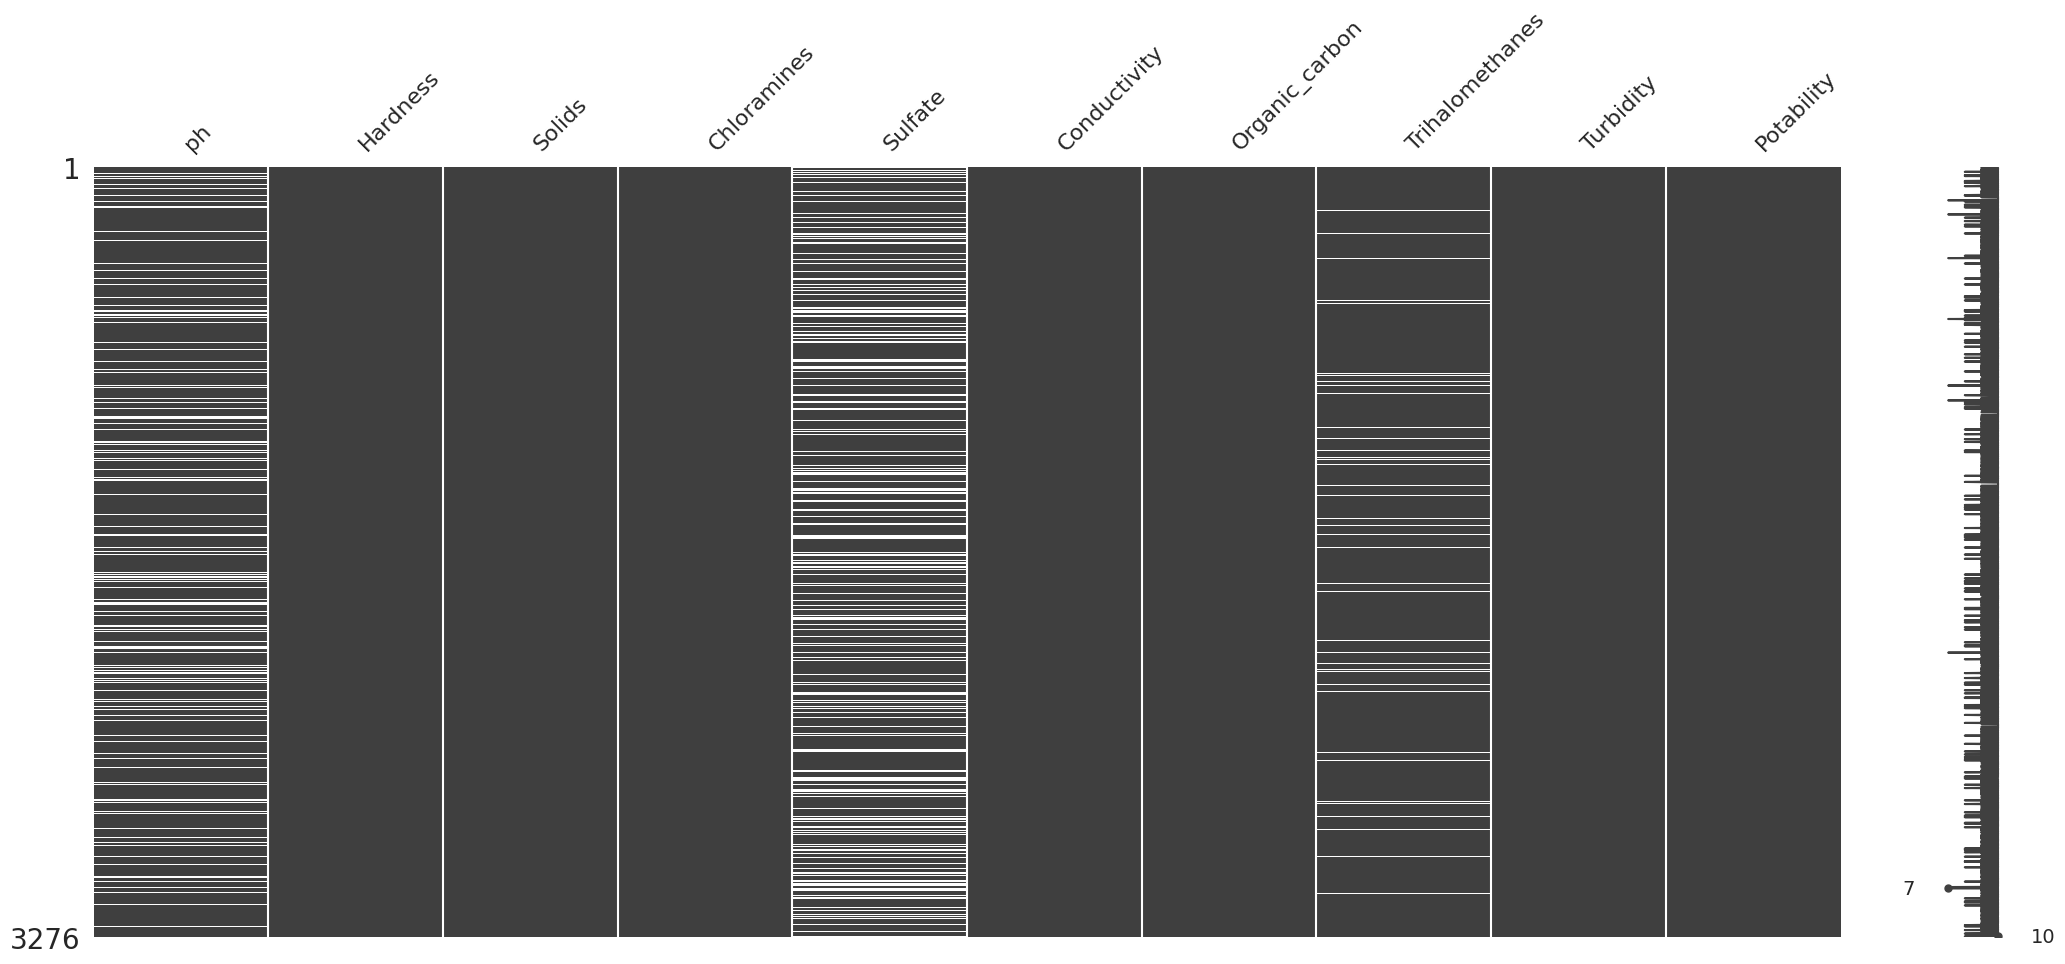

In [122]:
import missingno as msno
msno.matrix(dataframed)
plt.show()

# Missing Values : PH Value

Scientists measure the hardness of water using a pH scale, which measures the hydrogen-ion concentration in the liquid. Water with a low pH is more acidic, while water with a higher pH is harder or more alkaline, meaning it is able to neutralize acids.

The pH scale measures substances on a scale from 1 to 14, with 7 being neutral.

Reference : 
Howell, E. (2013, March 26). What makes water hard?. LiveScience. https://www.livescience.com/34462-water-hard-ph.html 



![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/Infographic_4.png)

In [123]:
print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 1 and Hardness > 150
PH VALUE : 7.1125


![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/Infographic_5.png)

In [124]:
# Condition 1
dataframed.loc[(dataframed['ph'].isnull()) & (dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150), 'ph'] = condition_1_mean_ph

# Condition 2
dataframed.loc[(dataframed['ph'].isnull()) & (dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150), 'ph'] = condition_2_mean_ph

# Condition 3
dataframed.loc[(dataframed['ph'].isnull()) & (dataframed['Potability'] == 1) & (dataframed['Hardness'] <= 150), 'ph'] = condition_3_mean_ph

# Condition 4
dataframed.loc[(dataframed['ph'].isnull()) & (dataframed['Potability'] == 1) & (dataframed['Hardness'] > 150), 'ph'] = condition_4_mean_ph

# Missing Values : Sulfate

Seawater contains roughly 2,700 milligrammes per litre (mg/L) of sulphate. Most freshwater supplies have concentrations of 3 to 30 mg/L, while some geographic regions have significantly greater quantities (1000 mg/L).

Note : Sadly the Dataset only contains data of Sulfate ranging from 129 to 481 (mg/L) so we will just get mean of the rows that are potable and not potable which has a difference of 2 (mg/L)


![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_6.png)

In [125]:
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = dataframed[(dataframed['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = dataframed[(dataframed['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_7.png)

In [126]:
dataframed.loc[dataframed['Sulfate'].isnull() & (dataframed['Potability'] == 0), 'Sulfate'] = condition_1_mean_sulfate
dataframed.loc[dataframed['Sulfate'].isnull() & (dataframed['Potability'] == 1), 'Sulfate'] = condition_2_mean_sulfate
              

# Missing Values : Trihalomethanes

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.


![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_8.png)

In [127]:
dataframed['Trihalomethanes'].fillna(value = dataframed['Trihalomethanes'].mean() , inplace = True)

# EDA

**Types of Rows :**

* Overall Water Samples
* Potable Water Samples
* Not Potable Water Samples

![Converted Image](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_9.png)

# Types of Rows : Overall Water Samples

# The Range of Values among different 10 columns

In [128]:
print("The Range of Values among different 10 columns")

print("Ph : {:.4f}".format(min(dataframed['ph'])) + " - {:.4f}".format(max(dataframed['ph'])))
print('\n')
print("Hardness : {:.4f}".format(min(dataframed['Hardness'])) + " - {:.4f}".format(max(dataframed['Hardness'])))
print('\n')
print("Solids : {:.4f}".format(min(dataframed['Solids'])) + " - {:.4f}".format(max(dataframed['Solids'])))
print('\n')
print("Chloramines : {:.4f}".format(min(dataframed['Chloramines'])) + " - {:.4f}".format(max(dataframed['Chloramines'])))
print('\n')
print("Sulfate : {:.4f}".format(min(dataframed['Sulfate'])) + " - {:.4f}".format(max(dataframed['Sulfate'])))
print('\n')
print("Conductivity : {:.4f}".format(min(dataframed['Conductivity'])) + " - {:.4f}".format(max(dataframed['Conductivity'])))
print('\n')
print("Organic Carbon : {:.4f}".format(min(dataframed['Organic_carbon'])) + " - {:.4f}".format(max(dataframed['Organic_carbon'])))
print('\n')
print("Trihalomethanes : {:.4f}".format(min(dataframed['Trihalomethanes'])) + " - {:.4f}".format(max(dataframed['Trihalomethanes'])))
print('\n')
print("Turbidity : {:.4f}".format(min(dataframed['Turbidity'])) + " - {:.4f}".format(max(dataframed['Turbidity'])))
print('\n')
print("Potability : {:.4f}".format(min(dataframed['Potability'])) + " - {:.4f}".format(max(dataframed['Potability'])))

The Range of Values among different 10 columns
Ph : nan - nan


Hardness : 47.4320 - 323.1240


Solids : 320.9426 - 61227.1960


Chloramines : 0.3520 - 13.1270


Sulfate : 129.0000 - 481.0306


Conductivity : 181.4838 - 753.3426


Organic Carbon : 2.2000 - 28.3000


Trihalomethanes : 0.7380 - 124.0000


Turbidity : 1.4500 - 6.7390


Potability : 0.0000 - 1.0000


# Distribution of Values among different 10 columns

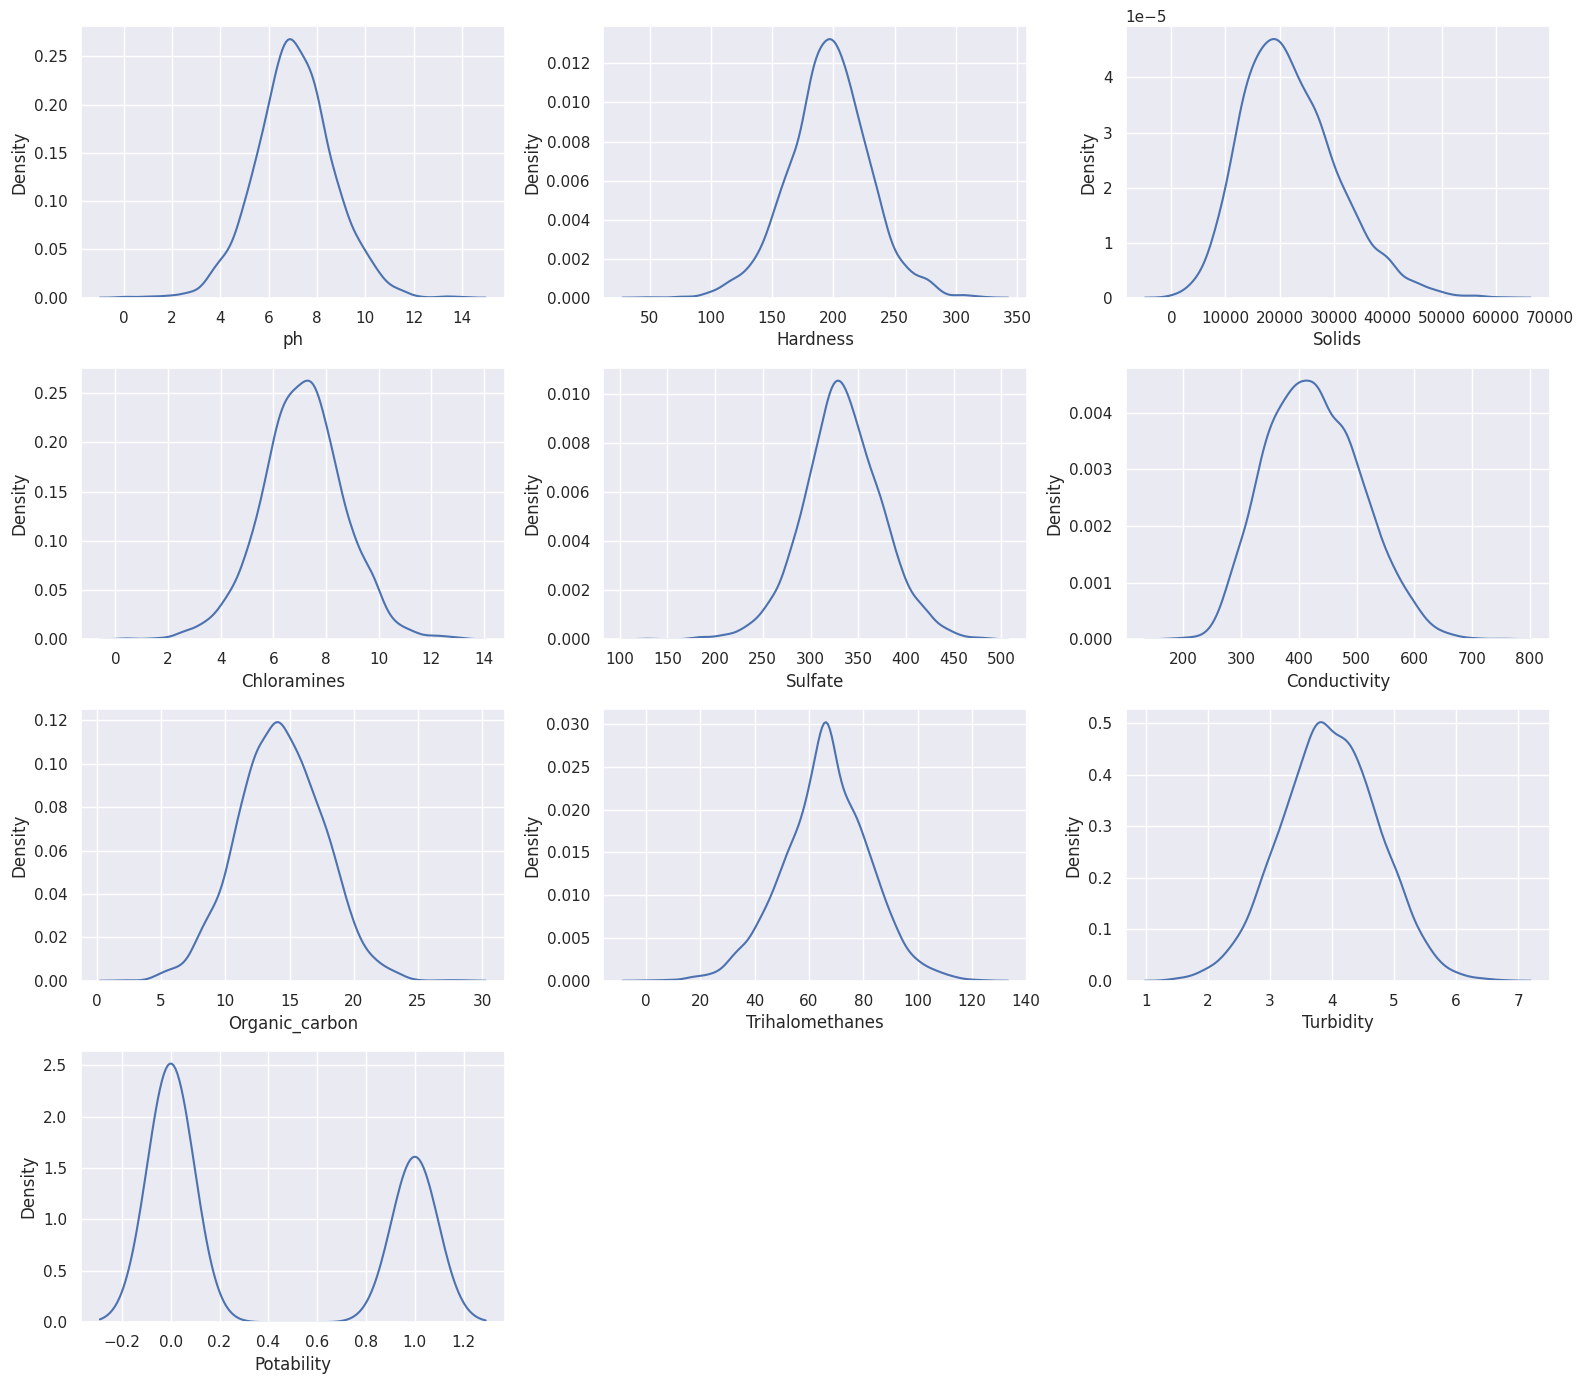

In [129]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=dataframed[col])
    plt.tight_layout()

# Pearson correlation coefficient Heatmap

This kind of correlation expresses a value from 1 to -1 to represent the strength of relativity among two different variables.

[Text(0.5, 56.016874999999985, 'Pearson Correlation Coefficient Heatmap')]

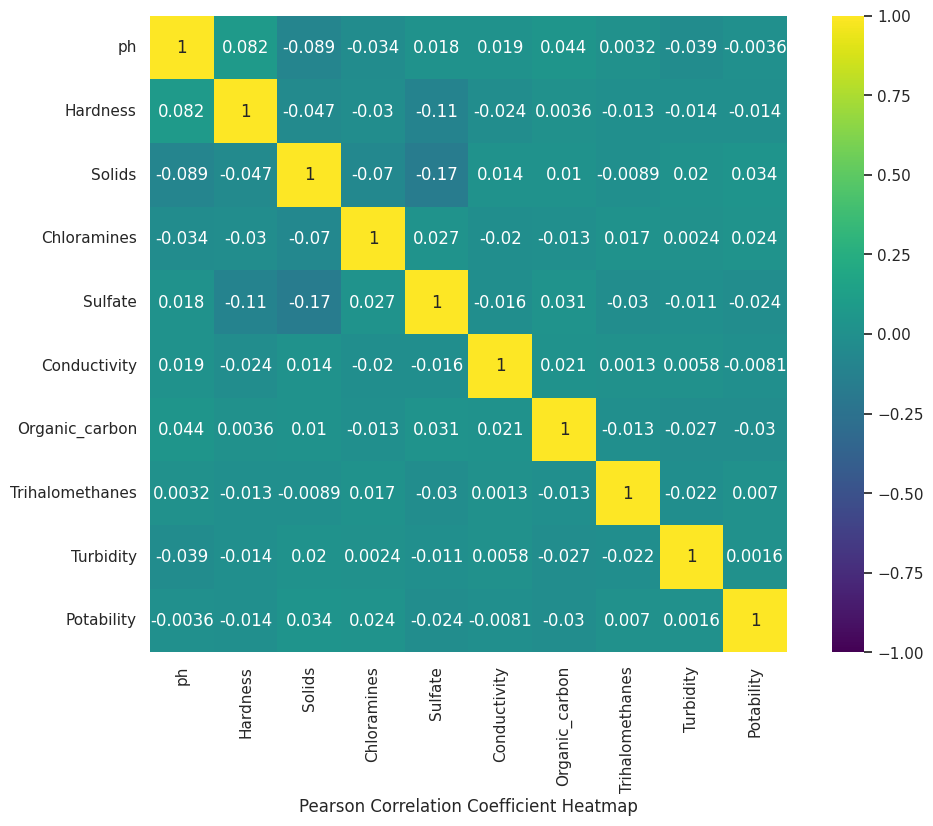

In [130]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heated = sns.heatmap(dataframed.corr("pearson"),vmin=-1, vmax=1,cmap='viridis',annot=True, square=True)
Heated.set(xlabel = "Pearson Correlation Coefficient Heatmap")

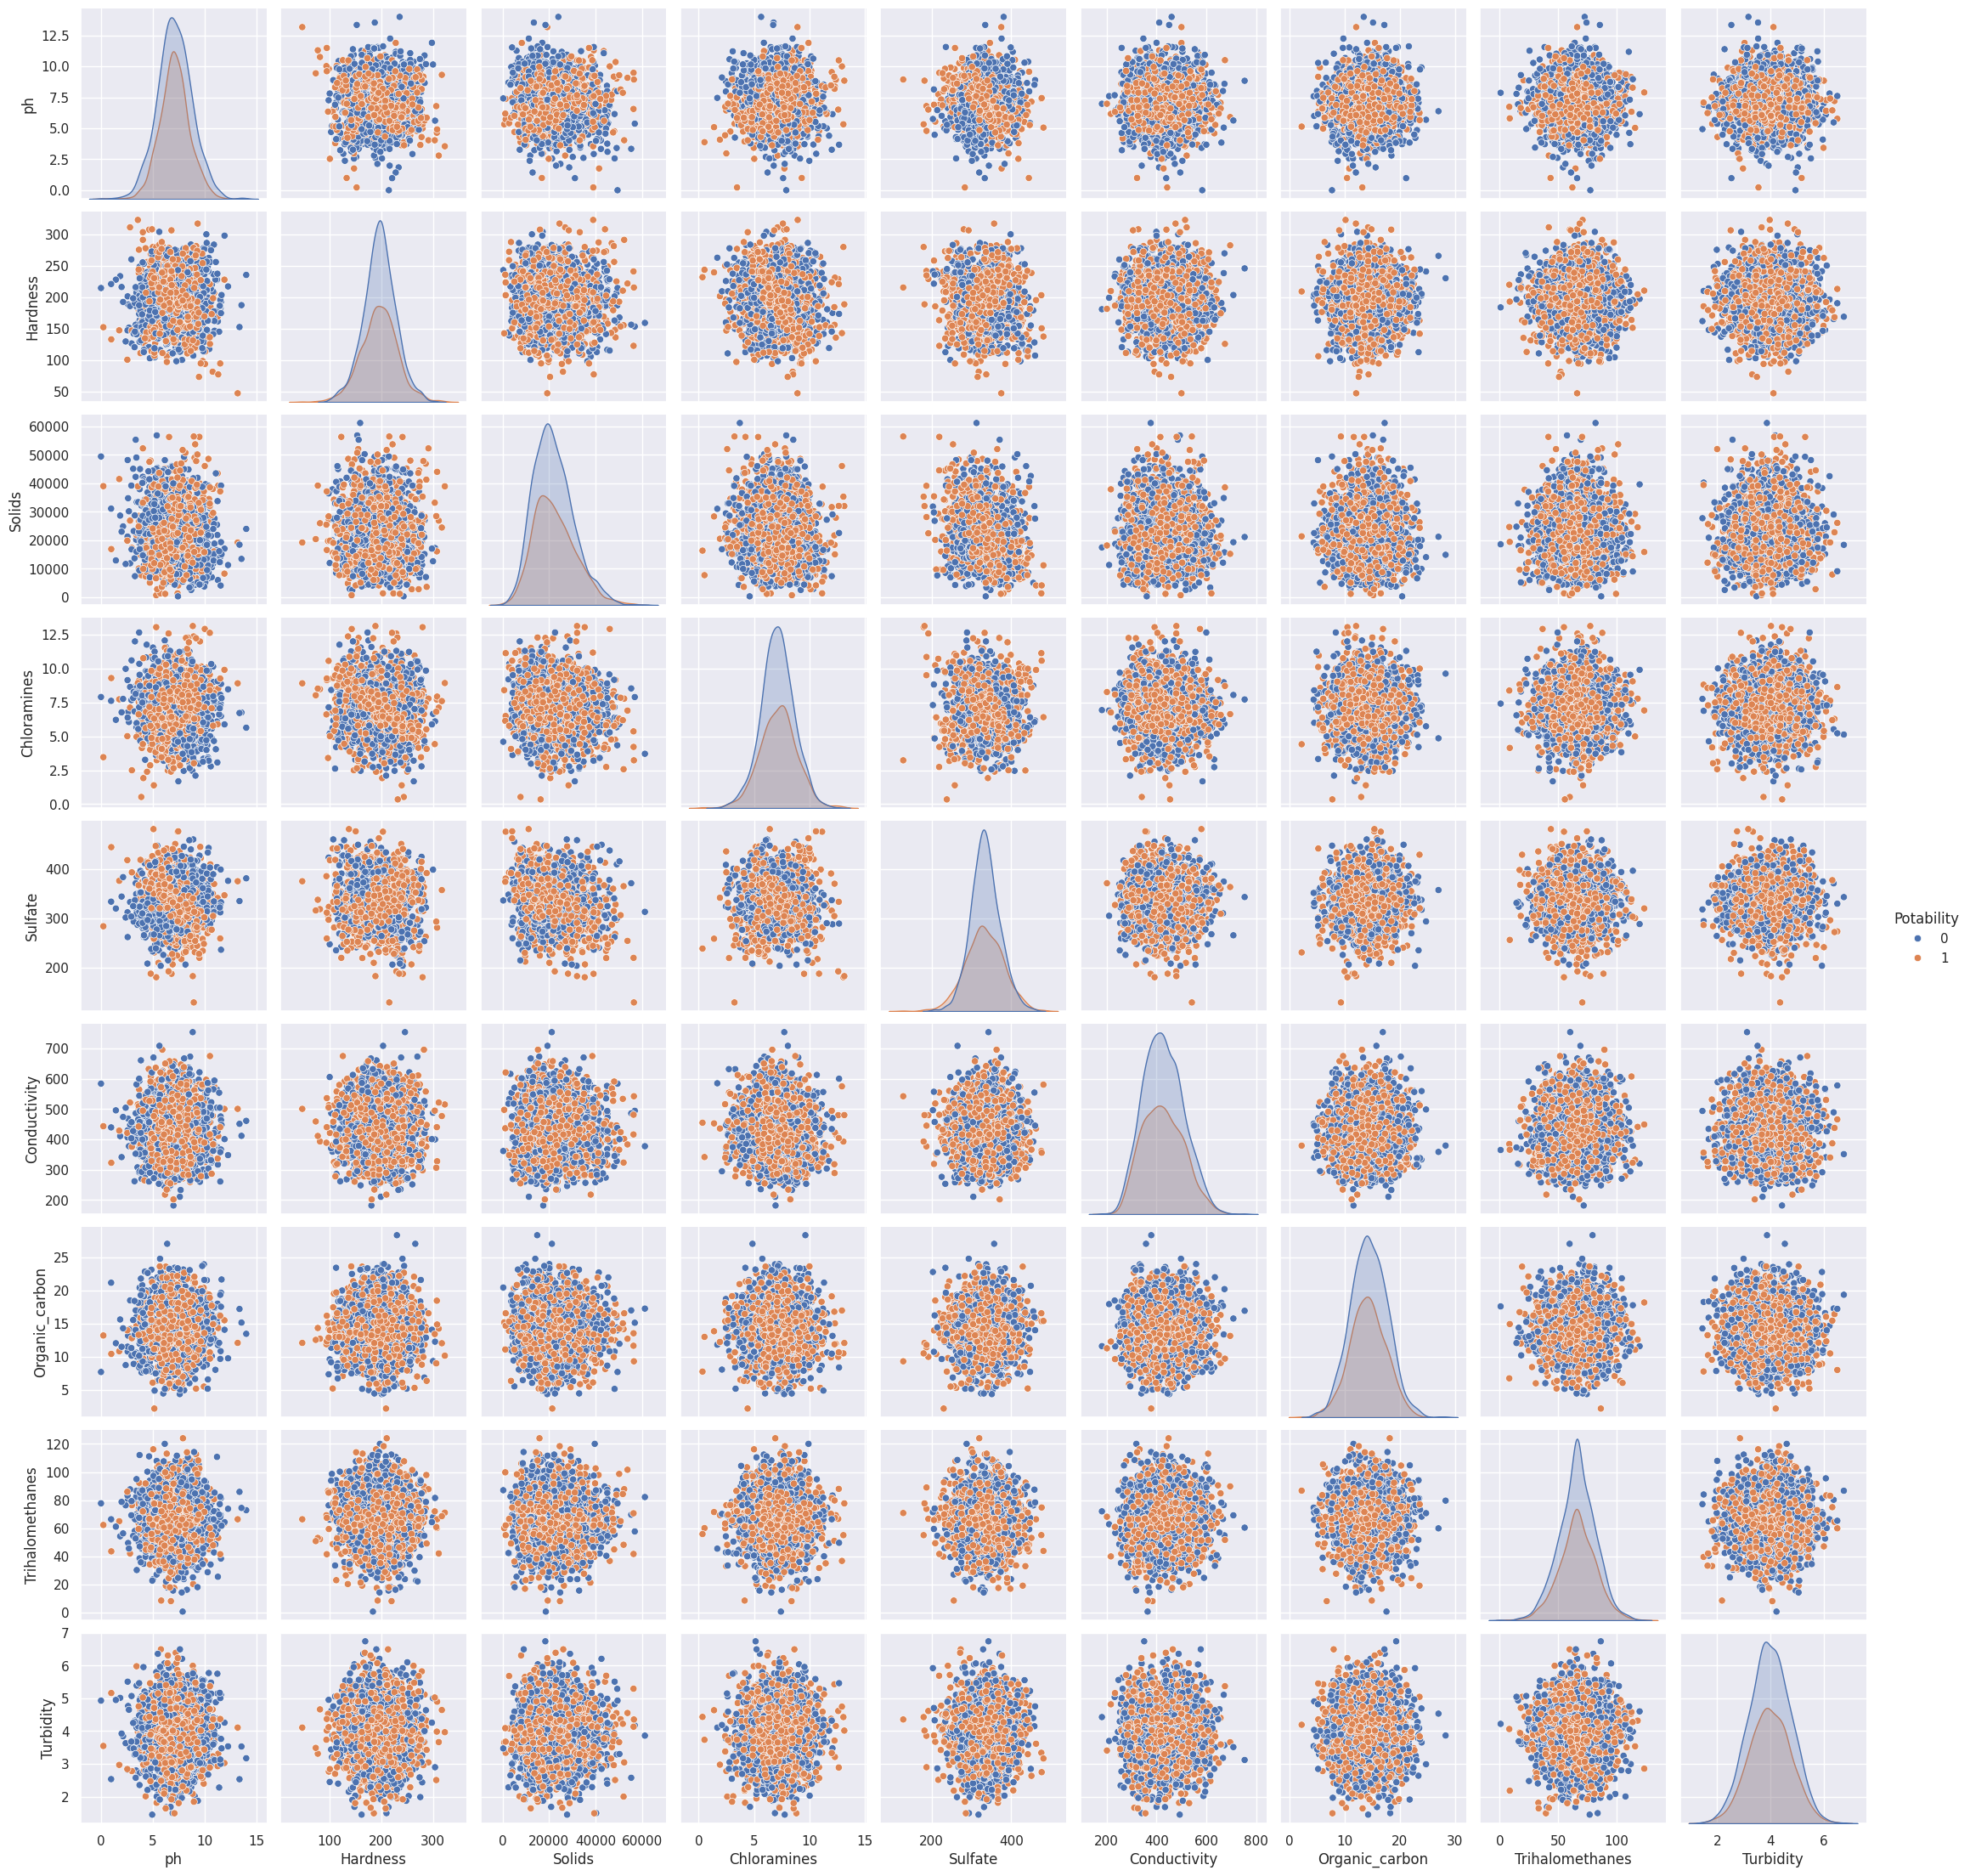

In [131]:
sns.pairplot(dataframed,hue='Potability')

# Check for Outliers among the different 10 columns

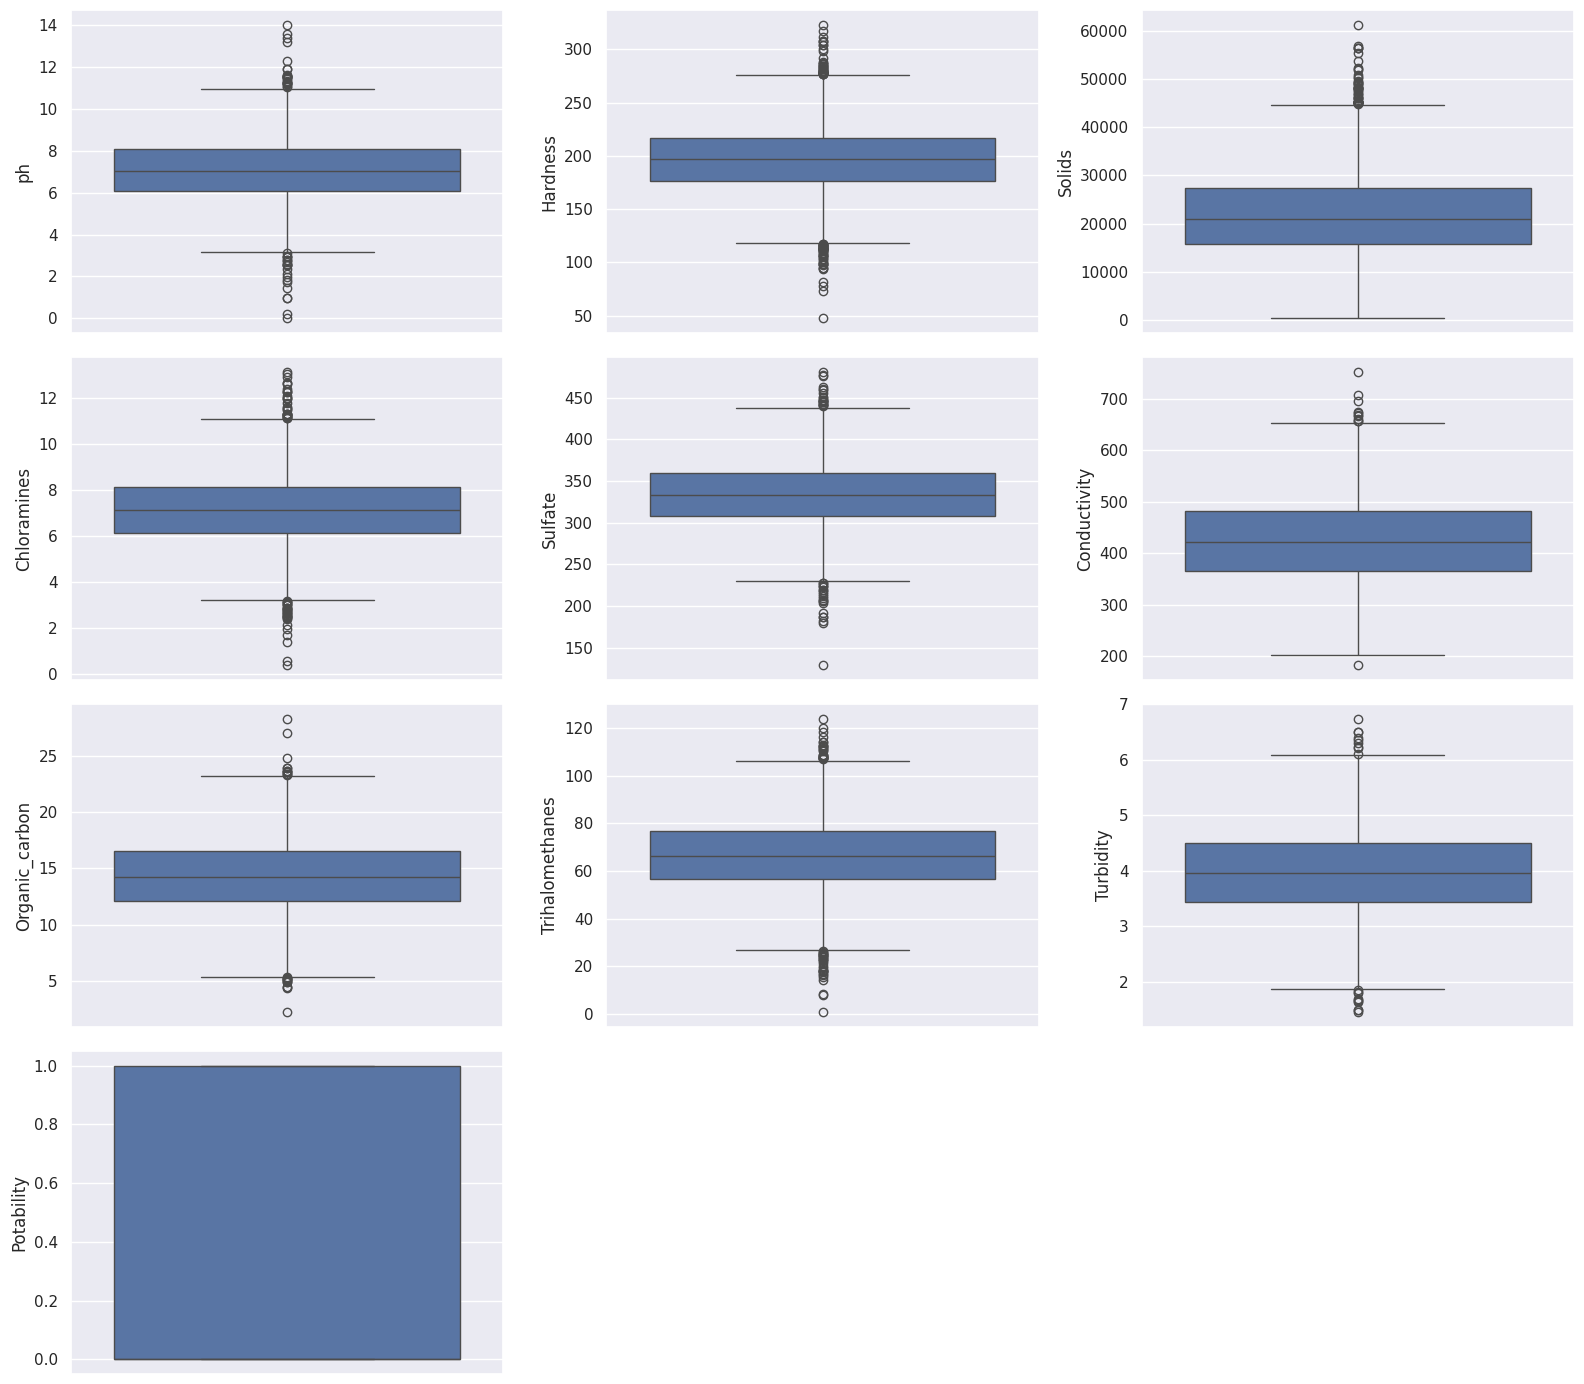

In [132]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=dataframed[col])
    
    plt.tight_layout()

# Column : PH Level

# Distribution of rows in terms of PH Level

[(0.0, 14.0)]

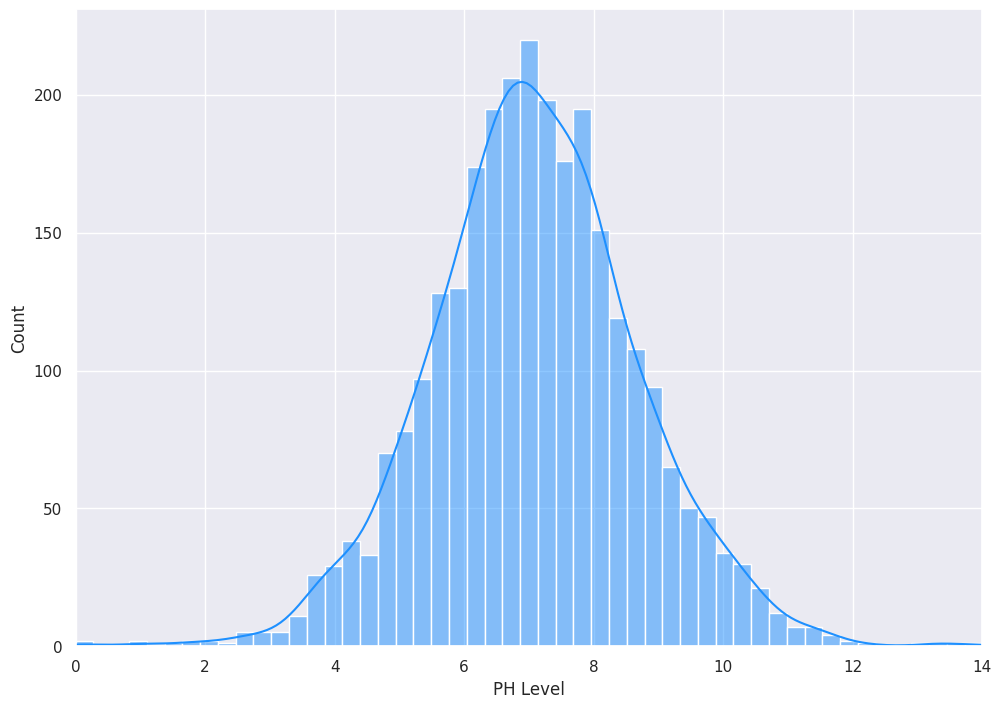

In [133]:
count_plotted = sns.histplot(x = 'ph', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "PH Level")
count_plotted.set(xlim = (0.0000, 14.0000))

# Outliers : Ph Level

[Text(0.5, 0, 'PH Level')]

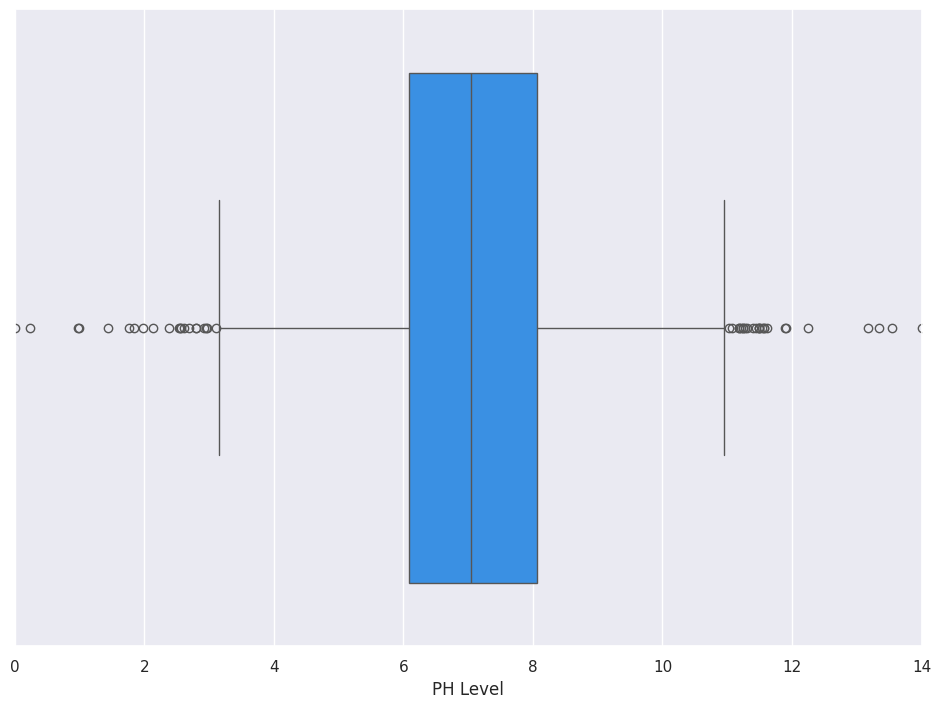

In [134]:
boxxer_plot = sns.boxplot(x = 'ph', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (0.0000, 14.0000))
boxxer_plot.set(xlabel = 'PH Level')

# How Many Outliers in Ph Level Column?

In [135]:
numpy_array = np.array(dataframed['ph'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Hardness

# Distribution of rows in terms of Hardness

[(47.432, 323.124)]

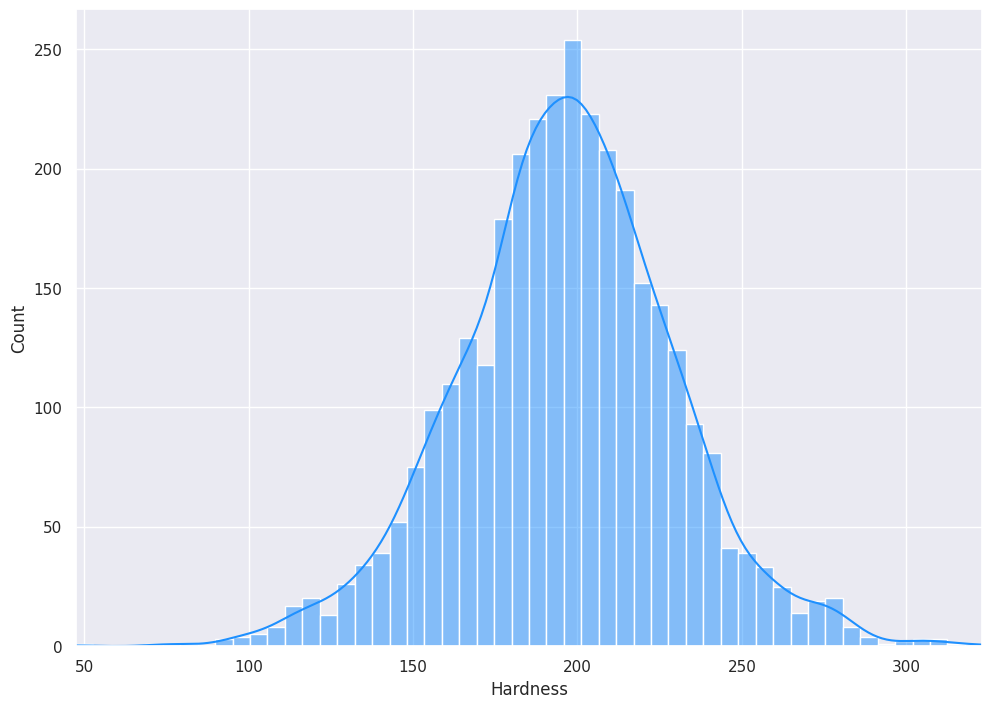

In [136]:
count_plotted = sns.histplot(x = 'Hardness', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Hardness")
count_plotted.set(xlim = (47.4320, 323.1240))

# Outliers : Hardness

[(47.432, 323.124)]

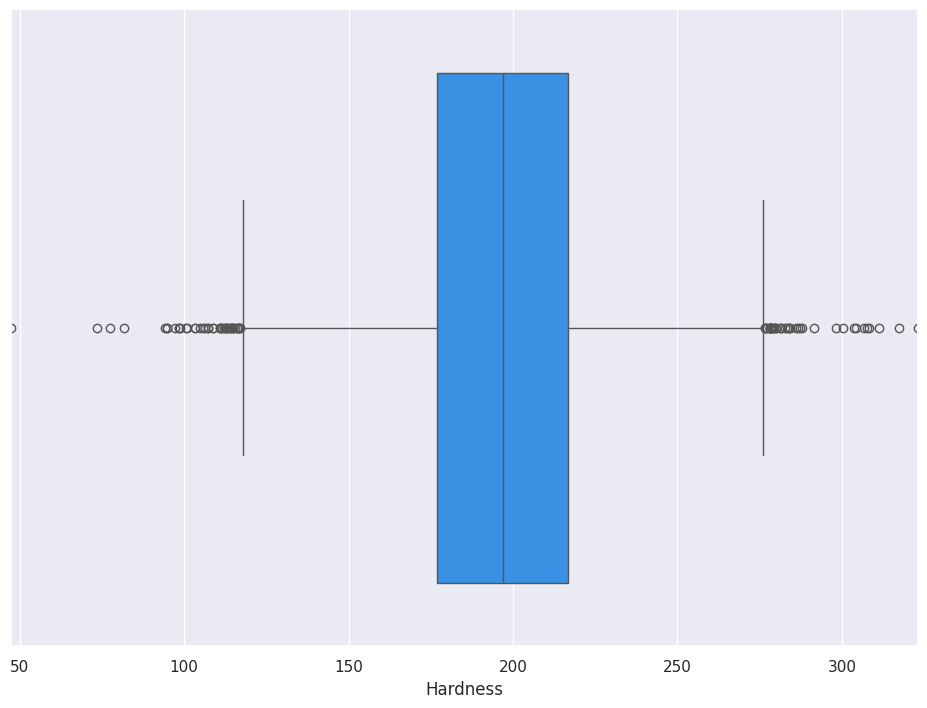

In [137]:
boxxer_plot = sns.boxplot(x = 'Hardness', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (47.4320, 323.1240))

# How Many Outliers in Hardness Column?

In [138]:
numpy_array = np.array(dataframed['Hardness'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 117.1252 or greater than 276.3928
There are 83 outliers.


# Column : Solids (Total dissolved solids - TDS)

# Distribution of rows in terms of Solids

[(320.9426, 61227.196)]

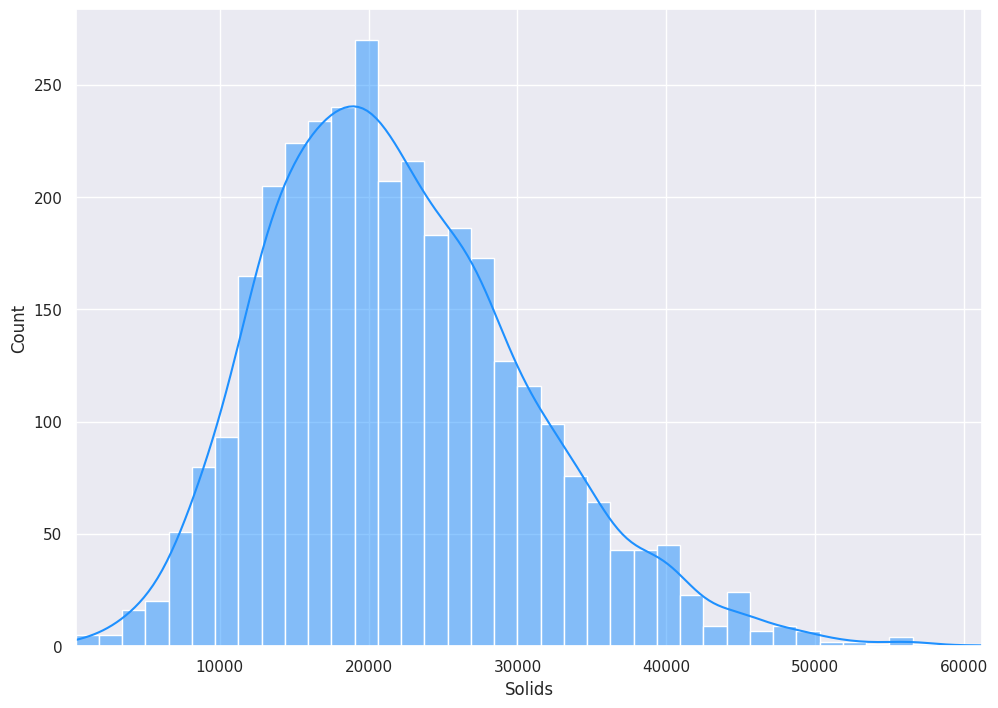

In [139]:
count_plotted = sns.histplot(x = 'Solids', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Solids")
count_plotted.set(xlim = (320.9426, 61227.1960))

# Outliers : Solids

[(320.9426, 61227.196)]

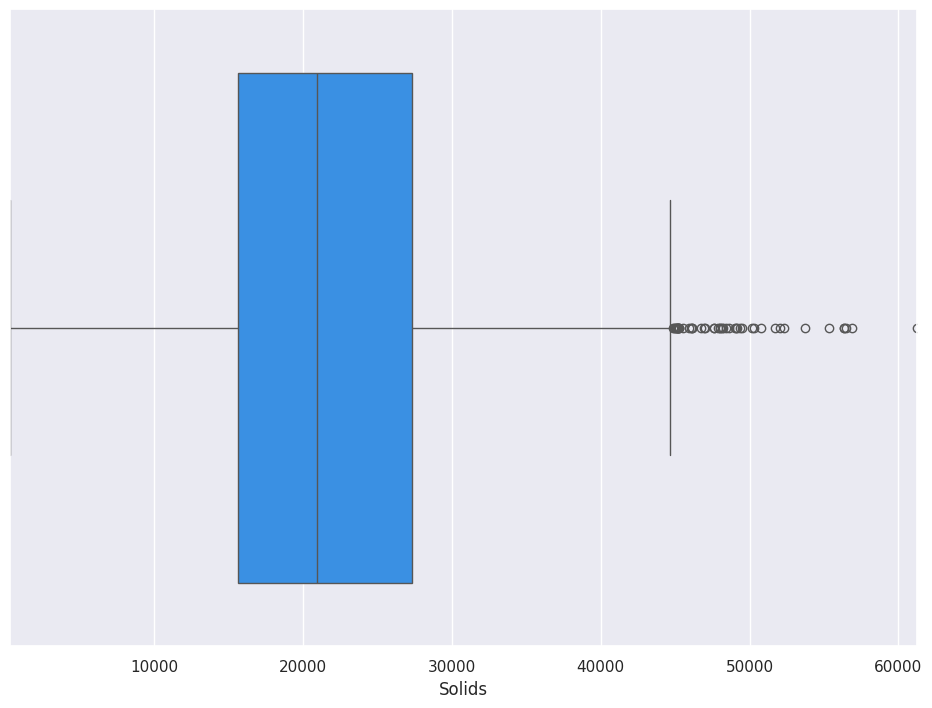

In [140]:
boxxer_plot = sns.boxplot(x = 'Solids', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (320.9426, 61227.1960))

# How Many Outliers in Solids Column?

In [141]:
numpy_array = np.array(dataframed['Solids'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are greater than 44831.8699
There are 47 outliers.


# Column : Chloramines

# Distribution of rows in terms of Chloramines

[(0.352, 13.127)]

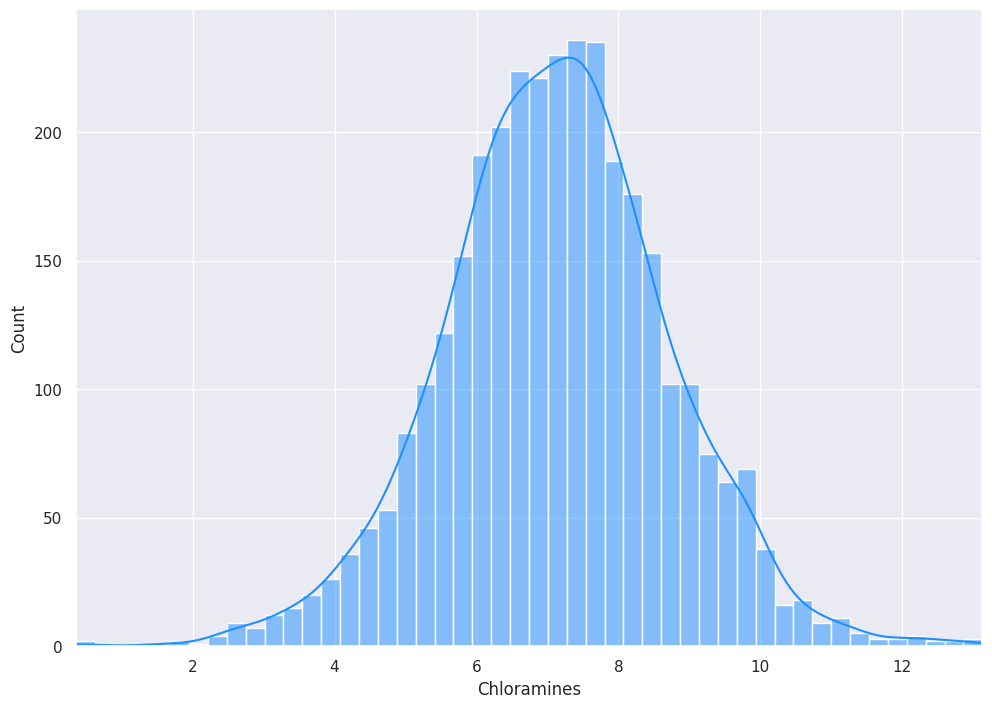

In [142]:
count_plotted = sns.histplot(x = 'Chloramines', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Chloramines")
count_plotted.set(xlim = (0.3520, 13.1270))

# Outliers : Chloramines

[(0.352, 13.127)]

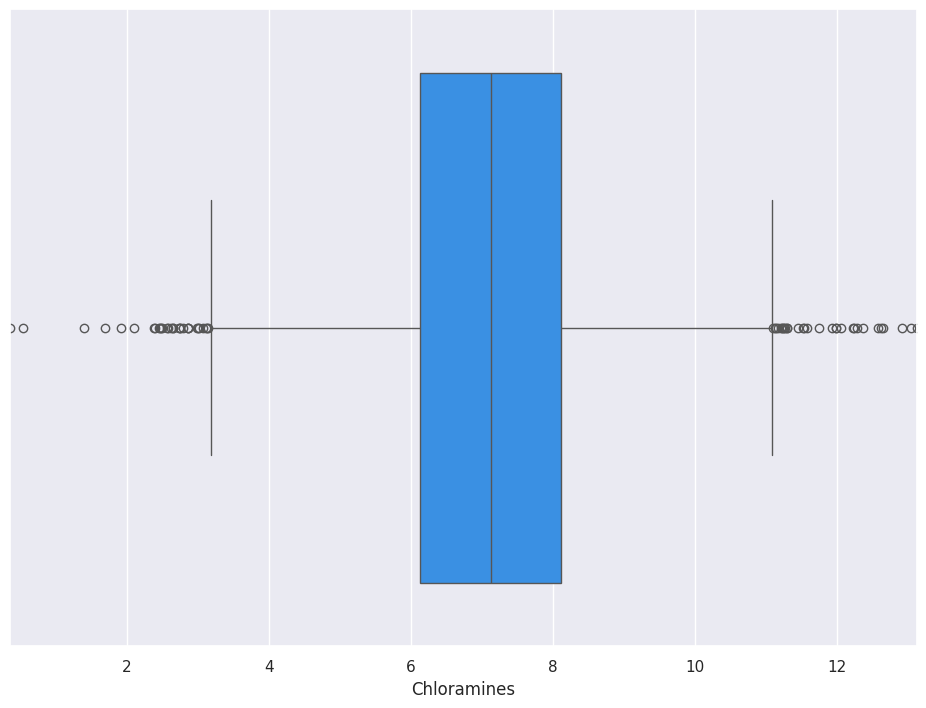

In [143]:
boxxer_plot = sns.boxplot(x = 'Chloramines', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (0.3520, 13.1270))

# How Many Outliers in Chloramines Column?

In [144]:
numpy_array = np.array(dataframed['Chloramines'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 3.1462 or greater than 11.0961
There are 61 outliers.


# Column : Sulfate

# Distribution of rows in terms of Sulfate

[(129.0, 481.0306)]

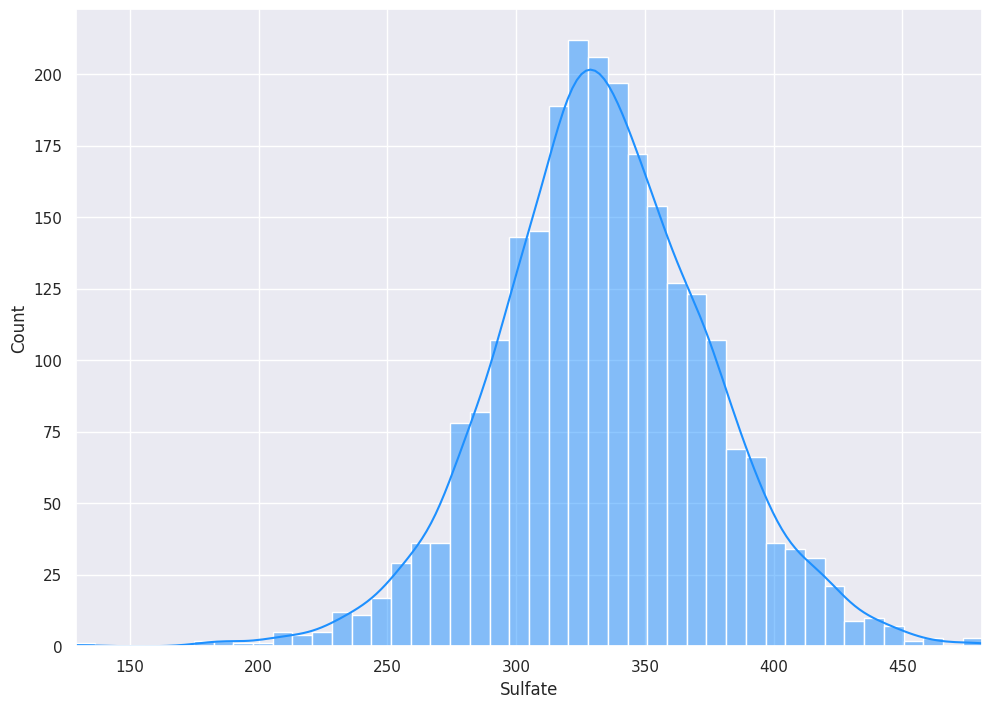

In [145]:
count_plotted = sns.histplot(x = 'Sulfate', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Sulfate")
count_plotted.set(xlim = (129.0000, 481.0306))

# Outliers : Sulfate

[(129.0, 481.0306)]

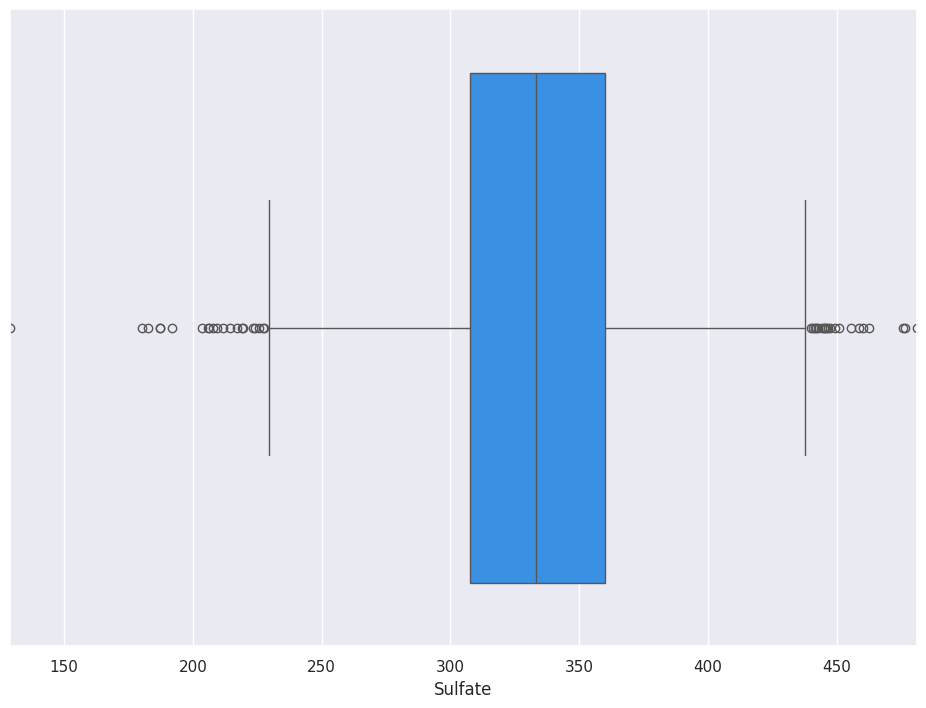

In [146]:
boxxer_plot = sns.boxplot(x = 'Sulfate', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (129.0000, 481.0306))

# How Many Outliers in Sulfate Column?

In [147]:
numpy_array = np.array(dataframed['Sulfate'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Conductivity

# Distribution of rows in terms of Conductivity

[(181.4838, 753.3426)]

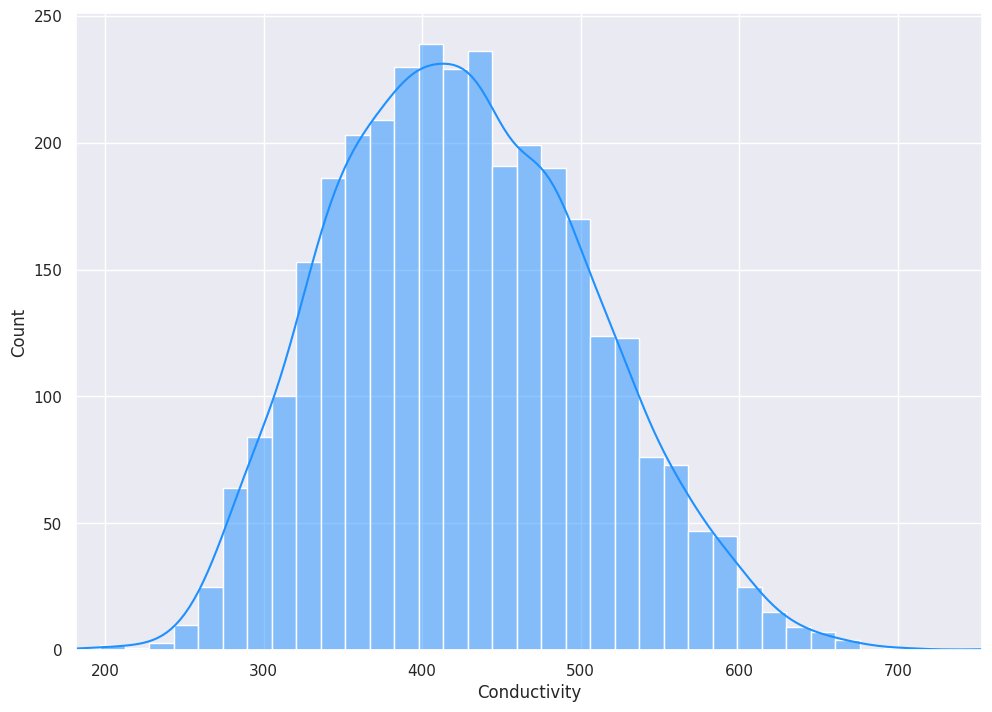

In [148]:
count_plotted = sns.histplot(x = 'Conductivity', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Conductivity")
count_plotted.set(xlim = (181.4838, 753.3426))

# Outliers : Conductivity

[(181.4838, 753.3426)]

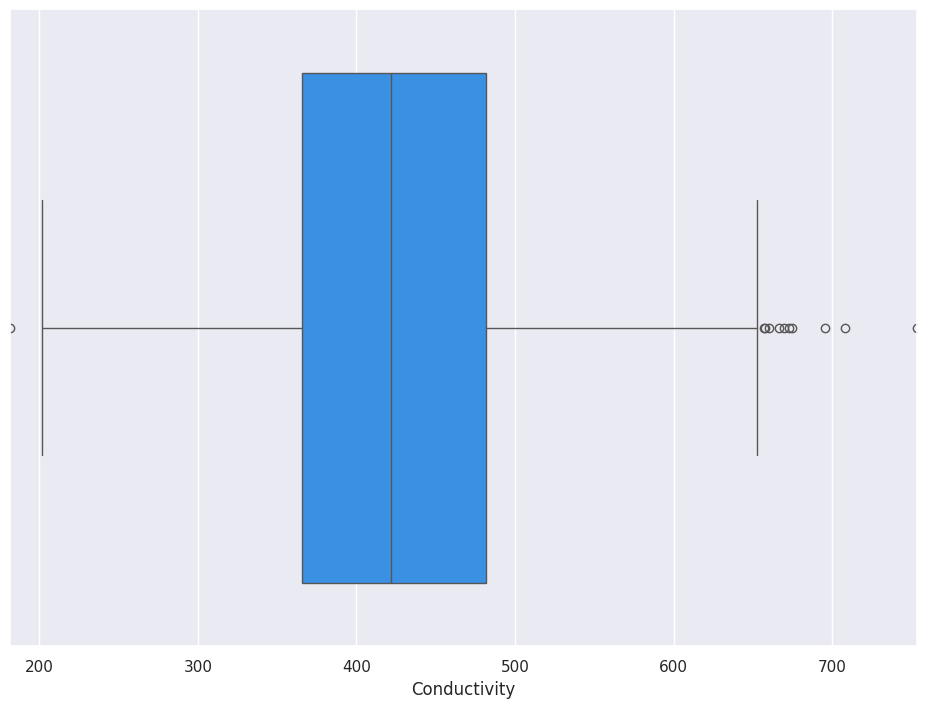

In [149]:
boxxer_plot = sns.boxplot(x = 'Conductivity', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (181.4838, 753.3426))

# How Many Outliers in Conductivity Column?

In [150]:
numpy_array = np.array(dataframed['Conductivity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 191.6476 or greater than 655.8791
There are 11 outliers.


# Column : Organic Carbon

# Distribution of rows in terms of Organic Carbon

[(-26.1, 29.60500000000001)]

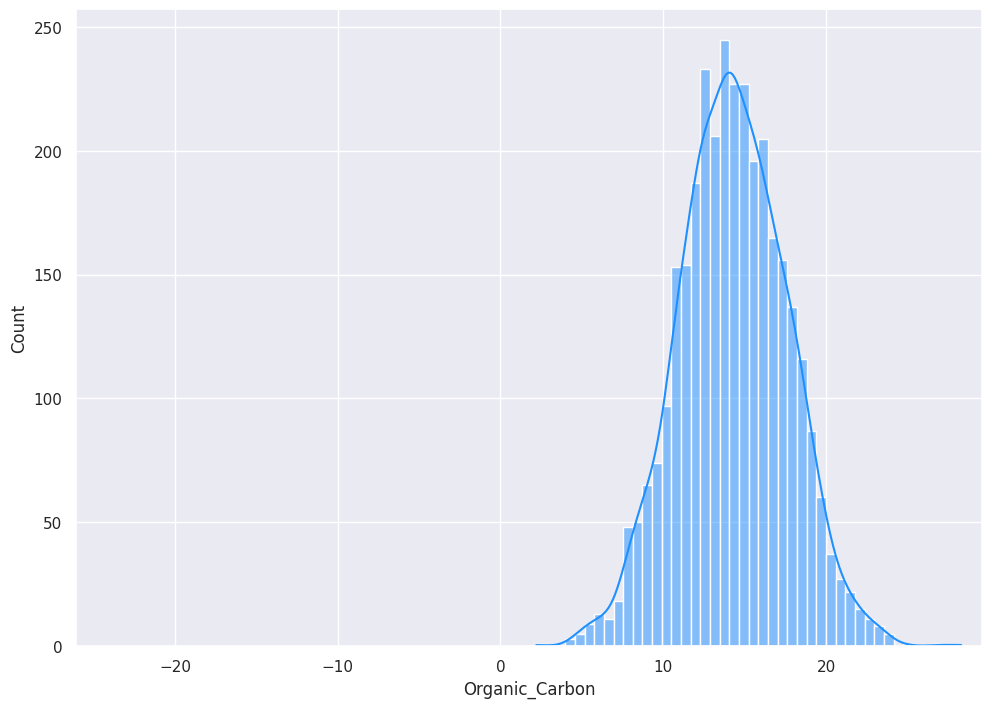

In [151]:
count_plotted = sns.histplot(x = 'Organic_carbon', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Organic_Carbon")
count_plotted.set(xlim = (2.2000 - 28.3000))

# Outliers : Organic Carbon

[(-26.1, 29.60500000000001)]

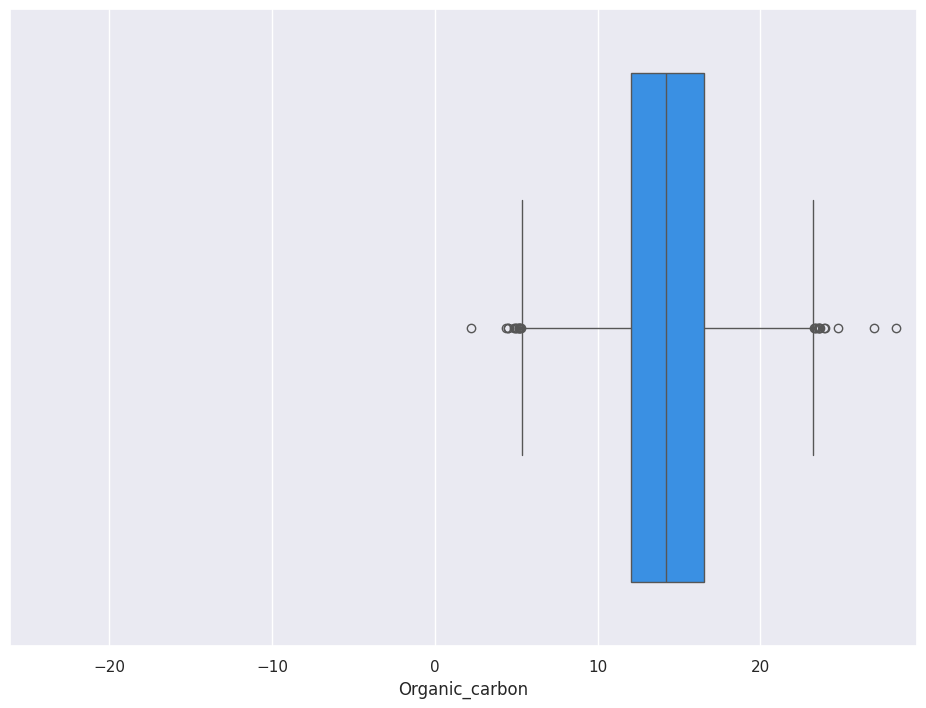

In [152]:
boxxer_plot = sns.boxplot(x = 'Organic_carbon', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (2.2000 - 28.3000))

# How Many Outliers in Organic Carbon Column?

In [153]:
numpy_array = np.array(dataframed['Organic_carbon'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 5.3280 or greater than 23.2954
There are 25 outliers.


# Column : Trihalomethanes

# Distribution of rows in terms of Trihalomethanes

[(-123.262, 130.1631)]

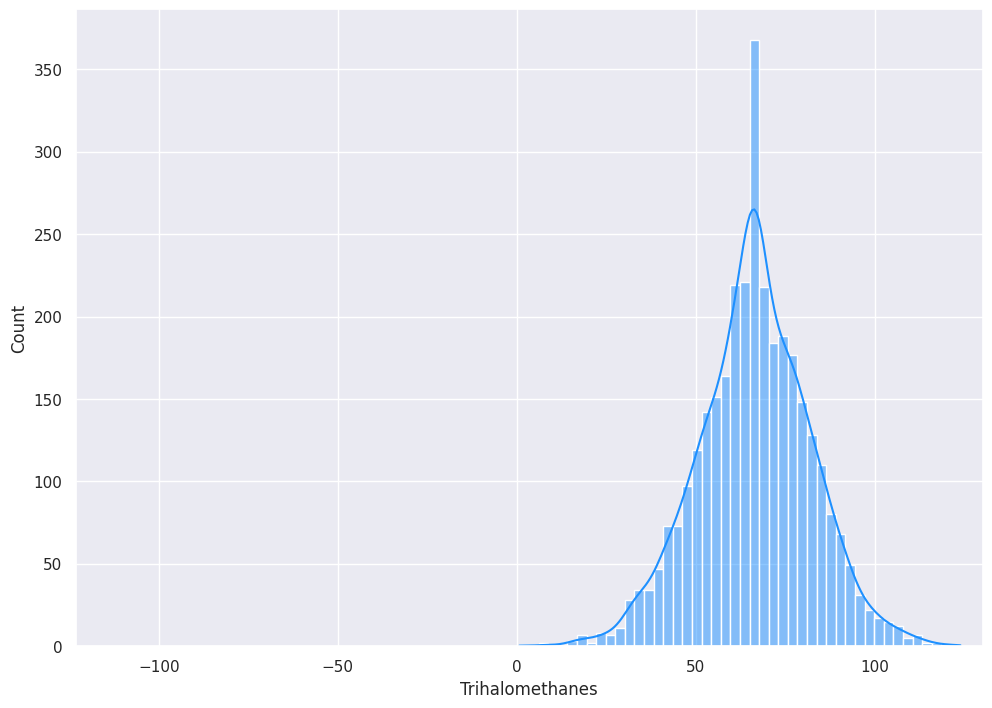

In [154]:
count_plotted = sns.histplot(x = 'Trihalomethanes', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Trihalomethanes")
count_plotted.set(xlim = (0.7380 - 124.0000))

# Outliers : Trihalomethanes

[(-123.262, 130.1631)]

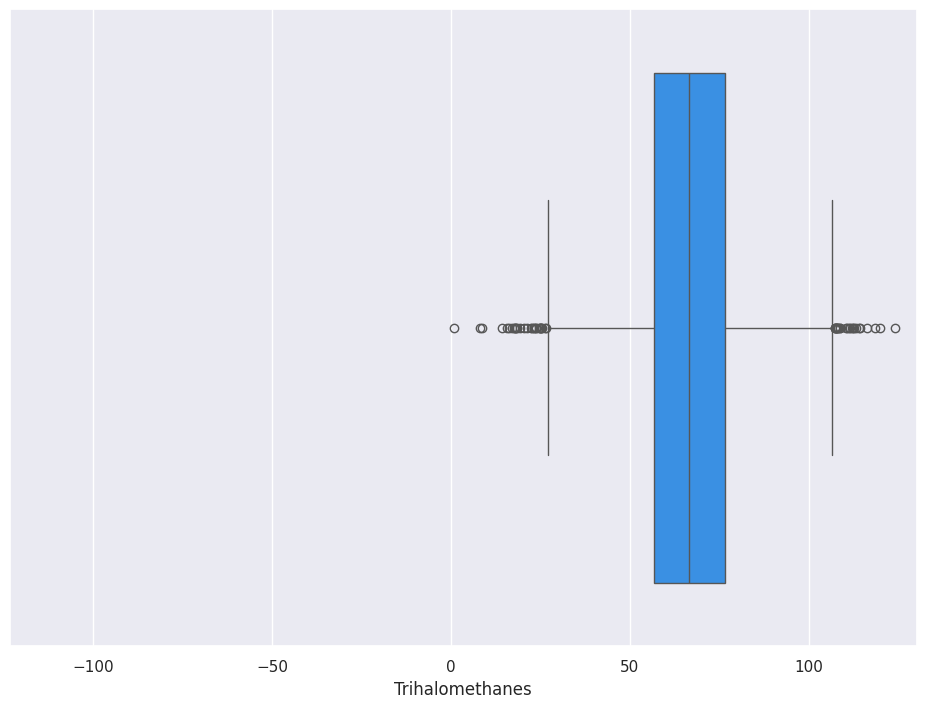

In [155]:
boxxer_plot = sns.boxplot(x = 'Trihalomethanes', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (0.7380 - 124.0000))

# How Many Outliers in Trihalomethanes Column?

In [156]:
numpy_array = np.array(dataframed['Trihalomethanes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 26.6192 or greater than 106.6950
There are 54 outliers.


# Column : Turbidity

# Distribution of rows in terms of Turbidity

[(-5.289, 7.00345)]

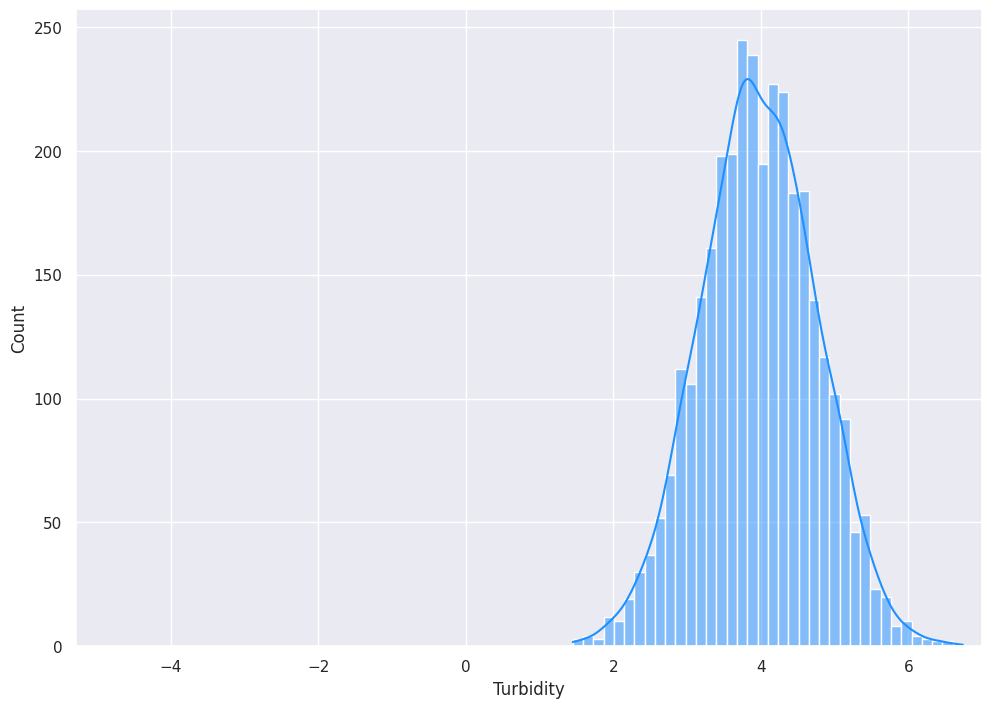

In [157]:
count_plotted = sns.histplot(x = 'Turbidity', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Turbidity")
count_plotted.set(xlim = (1.4500 - 6.7390))

# Outliers : Turbidity

[(-5.289, 7.00345)]

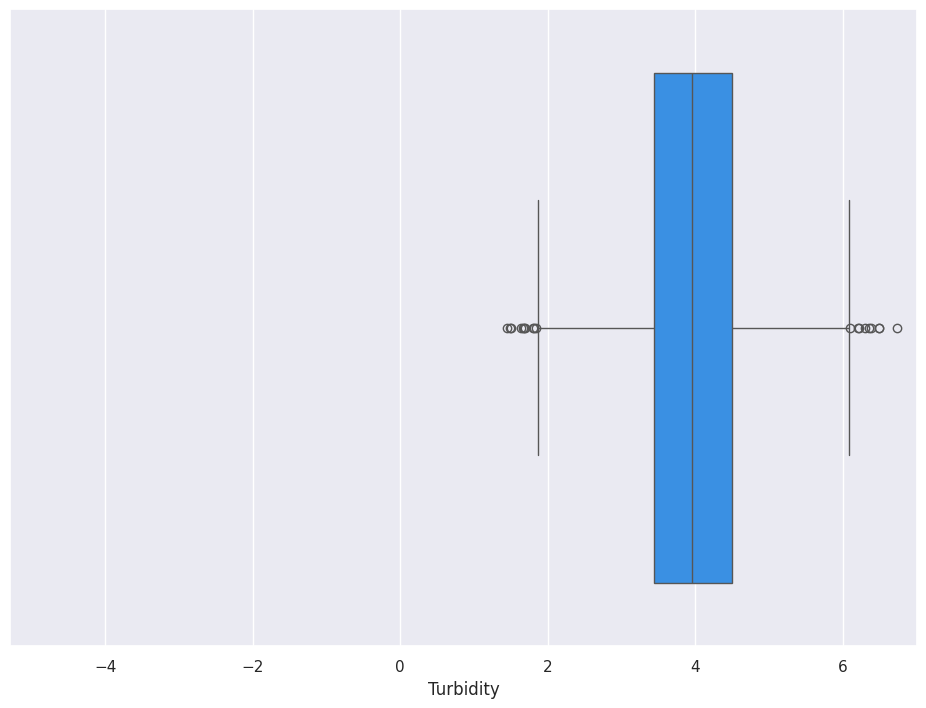

In [158]:
boxxer_plot = sns.boxplot(x = 'Turbidity', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (1.4500 - 6.7390))

# How Many Outliers in Turbidity Column?

In [159]:
numpy_array = np.array(dataframed['Turbidity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 1.8488 or greater than 6.0912
There are 19 outliers.


# Types of Rows : Potable Water Samples

# Column : PH Level

# Distribution of rows in terms of PH Level

[(0.0, 14.0)]

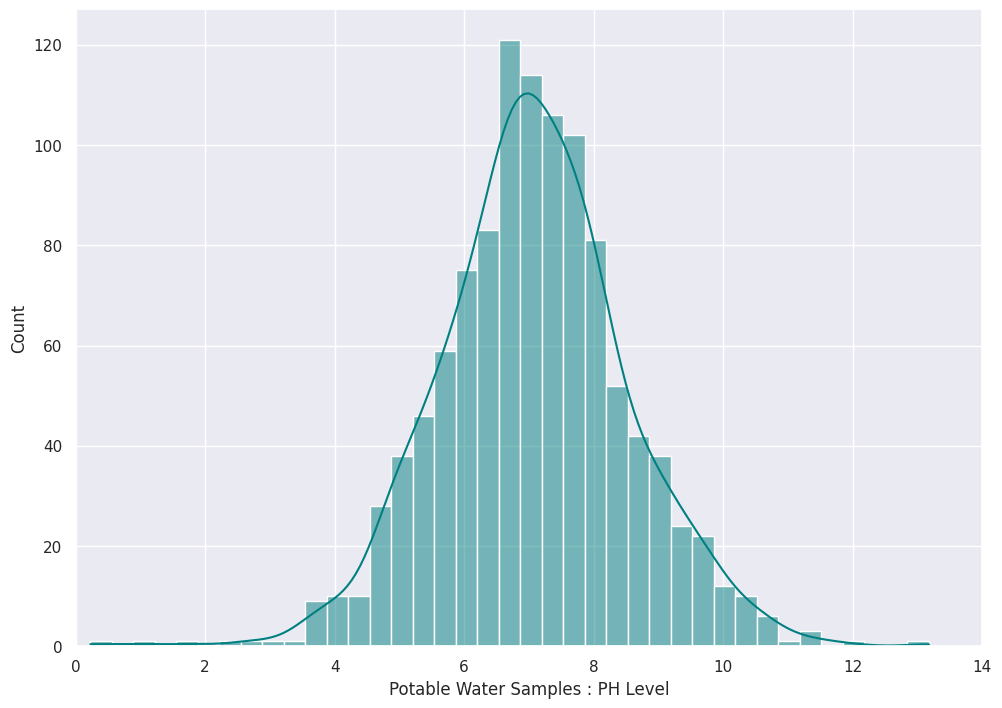

In [160]:
count_plotted = sns.histplot(x = 'ph', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : PH Level")
count_plotted.set(xlim = (0.0000, 14.0000))

# Outliers : PH Level

[Text(0.5, 0, 'Potable Water Samples : PH Level')]

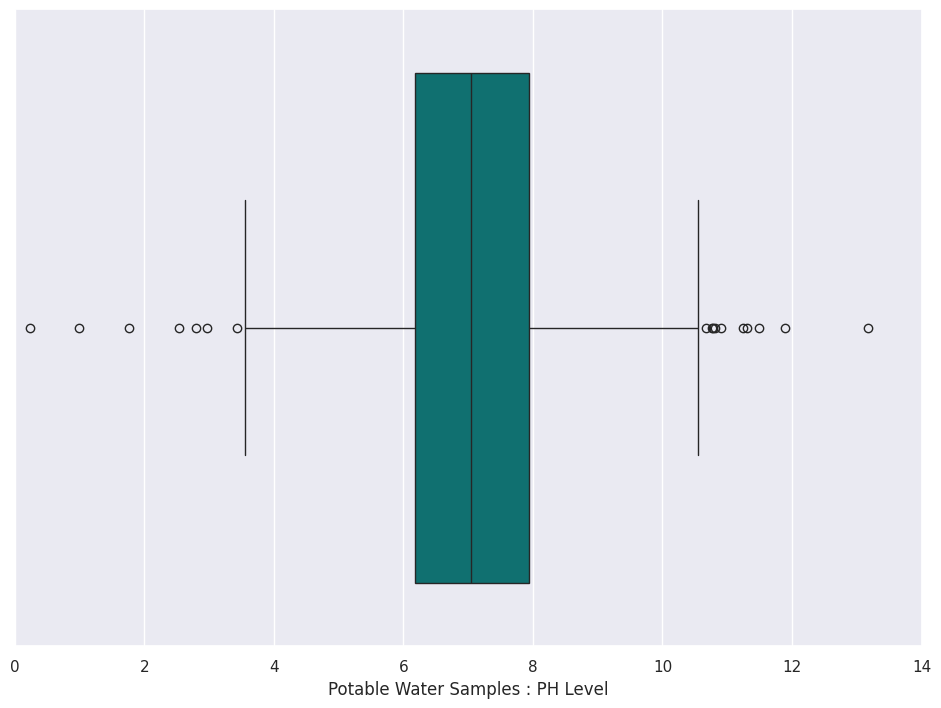

In [161]:
boxxer_plot = sns.boxplot(x = 'ph', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (0.0000, 14.0000))
boxxer_plot.set(xlabel = 'Potable Water Samples : PH Level')

# How Many Outliers in PH Level Column?

In [162]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['ph'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Hardness

# Distribution of rows in terms of Hardness

[(47.432, 323.124)]

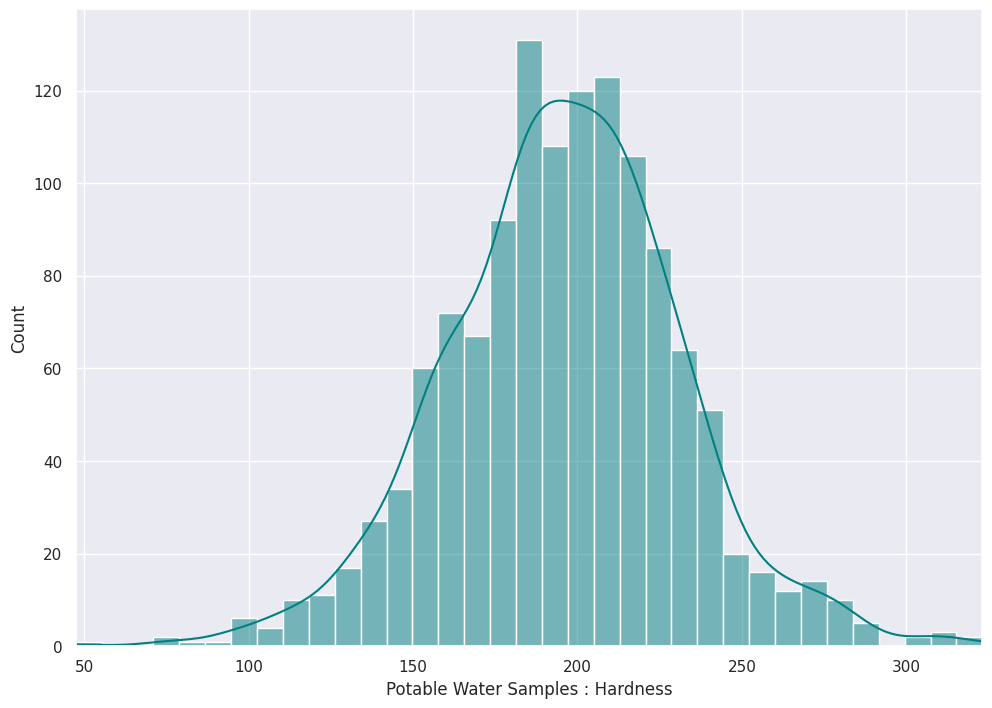

In [163]:
count_plotted = sns.histplot(x = 'Hardness', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Hardness")
count_plotted.set(xlim = (47.4320, 323.1240))

# Outliers : Hardness

[Text(0.5, 0, 'Potable Water Samples : Hardness')]

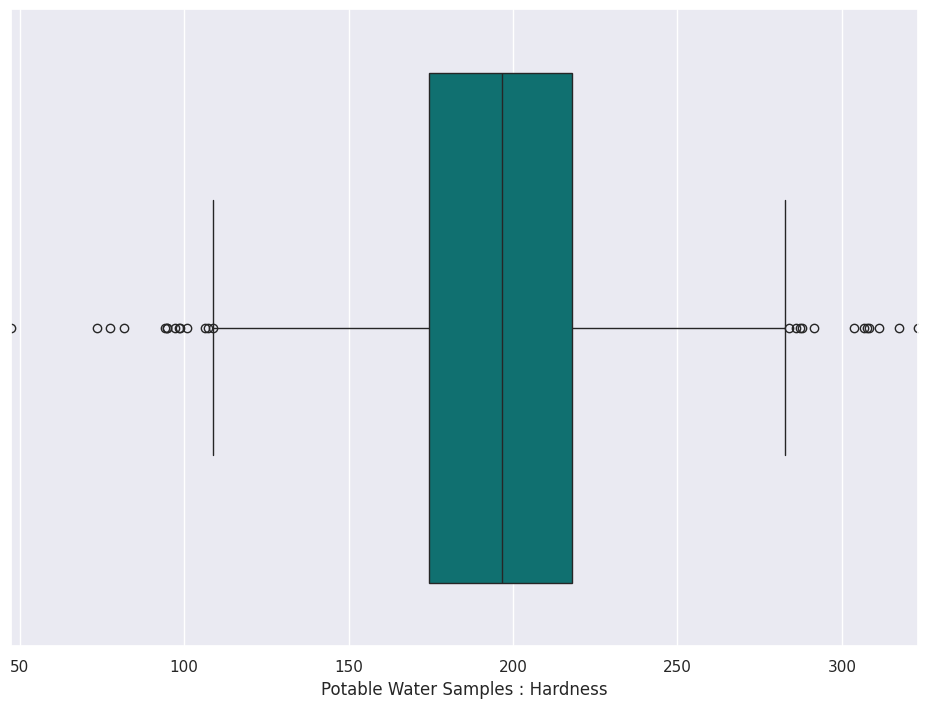

In [164]:
boxxer_plot = sns.boxplot(x = 'Hardness', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (47.4320, 323.1240))
boxxer_plot.set(xlabel = 'Potable Water Samples : Hardness')

# How Many Outliers in Hardness Column?

In [165]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Hardness'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 108.8212 or greater than 283.5128
There are 26 outliers.


# Column : Solids (Total dissolved solids - TDS)

# Distribution of rows in terms of Solids

[(320.9426, 61227.196)]

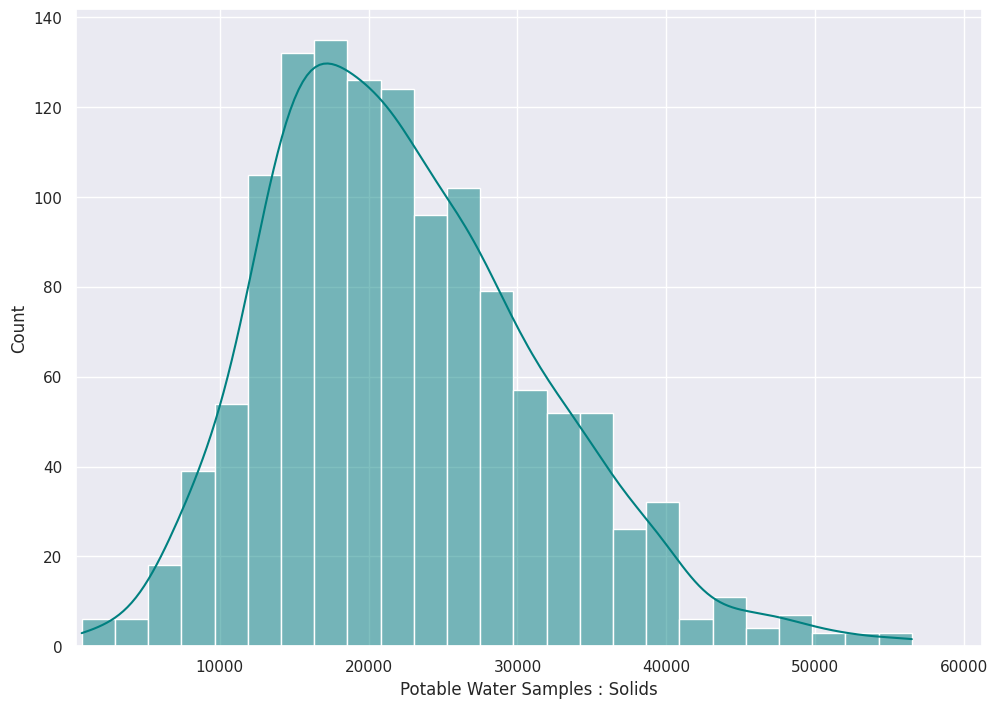

In [166]:
count_plotted = sns.histplot(x = 'Solids', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Solids")
count_plotted.set(xlim = (320.9426, 61227.1960))

# Outliers : Solids

[(320.9426, 61227.196)]

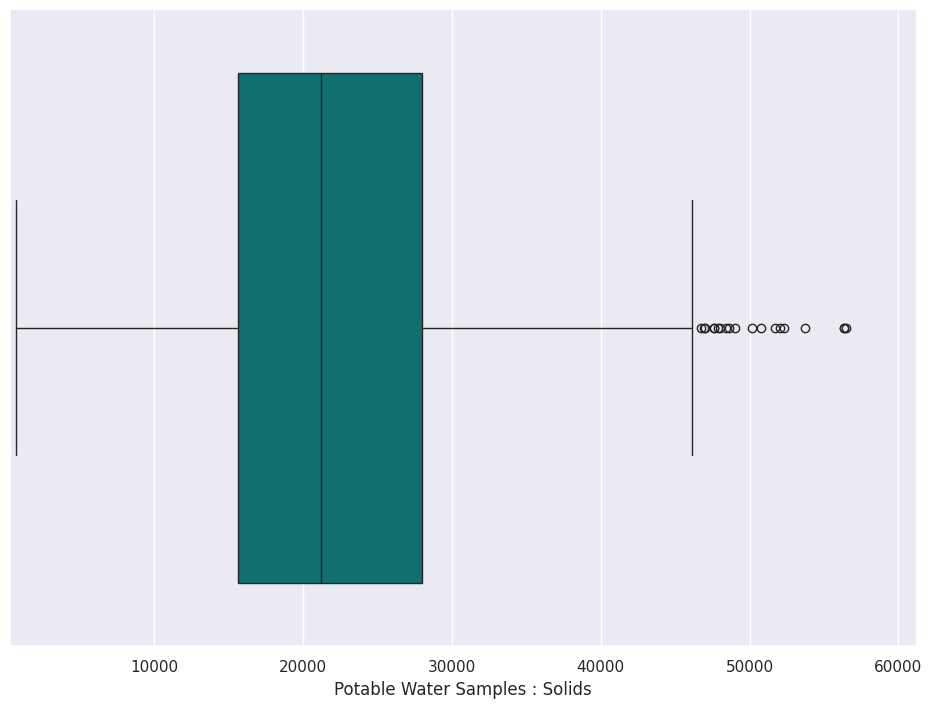

In [167]:
boxxer_plot = sns.boxplot(x = 'Solids', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlabel = 'Potable Water Samples : Solids')
boxxer_plot.set(xlim = (320.9426, 61227.1960))

# How Many Outliers in Solids Column?

In [168]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Solids'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are greater than 46429.6136
There are 19 outliers.


# Column : Chloramines

# Distribution of rows in terms of Chloramines

[(0.352, 13.127)]

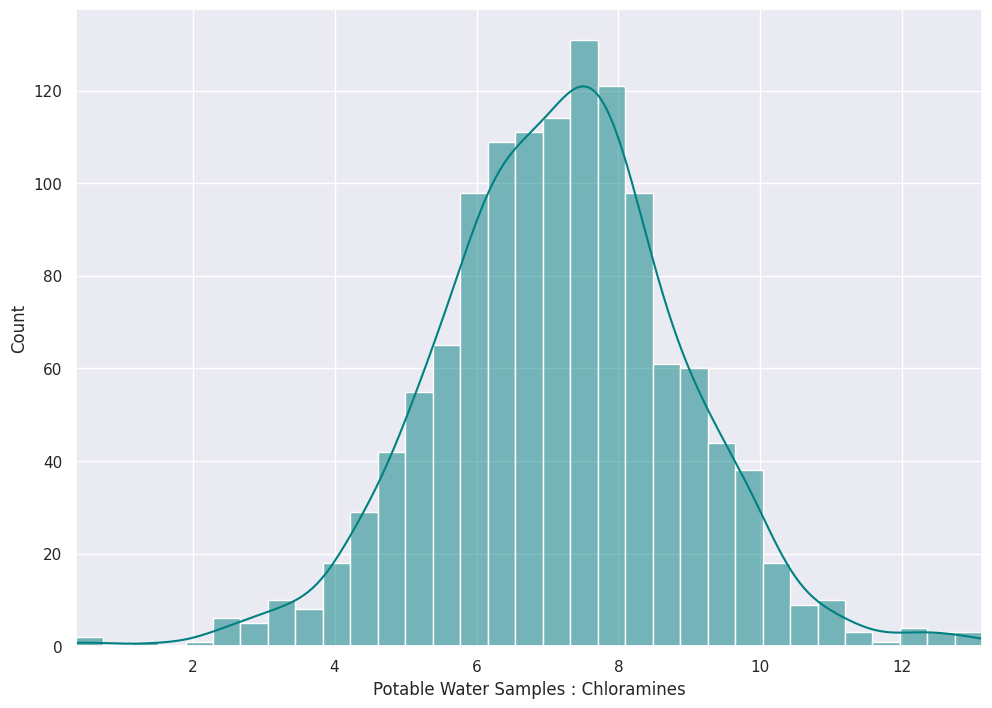

In [169]:
count_plotted = sns.histplot(x = 'Chloramines', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Chloramines")
count_plotted.set(xlim = (0.3520, 13.1270))

# Outliers : Chloramines

[Text(0.5, 0, 'Potable Water Samples : Chloramines')]

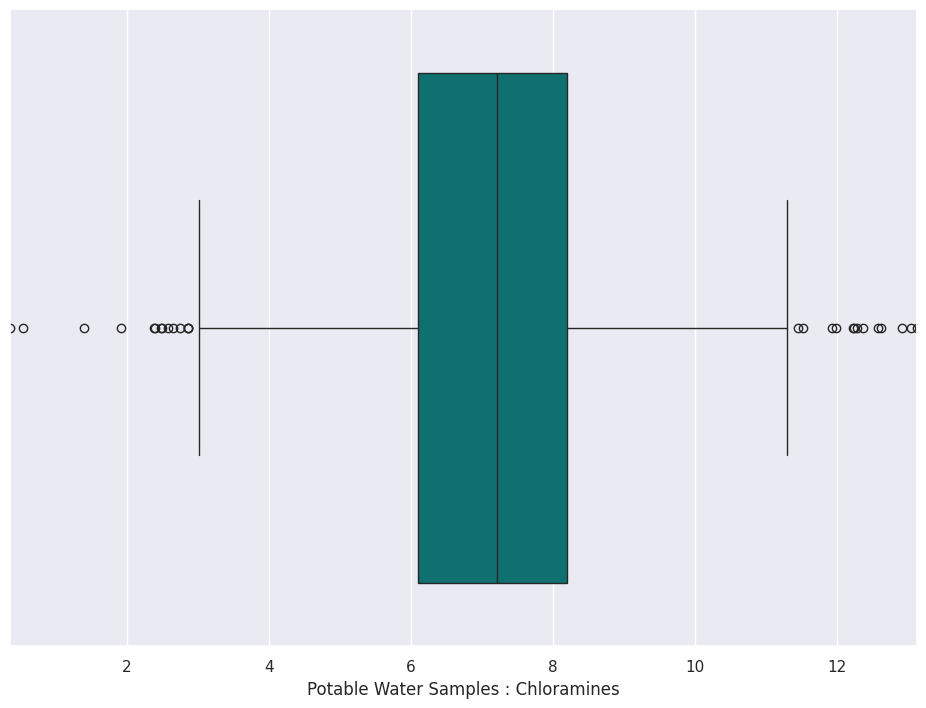

In [170]:
boxxer_plot = sns.boxplot(x = 'Chloramines', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (0.3520, 13.1270))
boxxer_plot.set(xlabel = "Potable Water Samples : Chloramines")

# How Many Outliers in Chloramines Column?

In [171]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Chloramines'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 2.9364 or greater than 11.3570
There are 27 outliers.


# Column : Sulfate

# Distribution of rows in terms of Sulfate

[(129.0, 481.0306)]

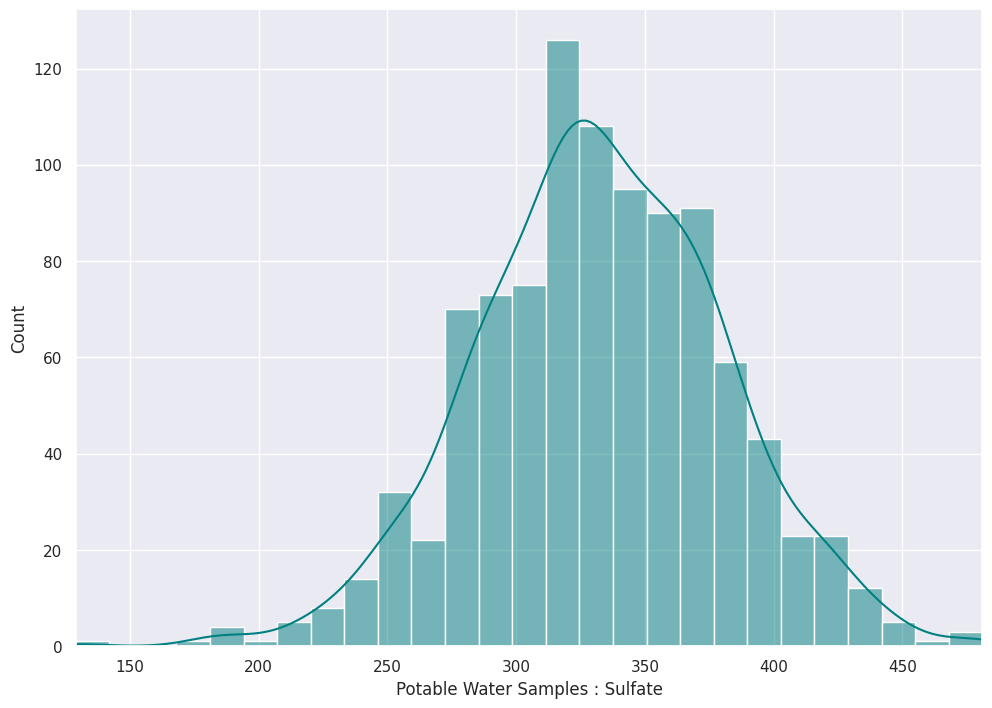

In [172]:
count_plotted = sns.histplot(x = 'Sulfate', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Sulfate")
count_plotted.set(xlim = (129.0000, 481.0306))

# Outliers : Sulfate

[Text(0.5, 0, 'Potable Water Samples : Sulfate')]

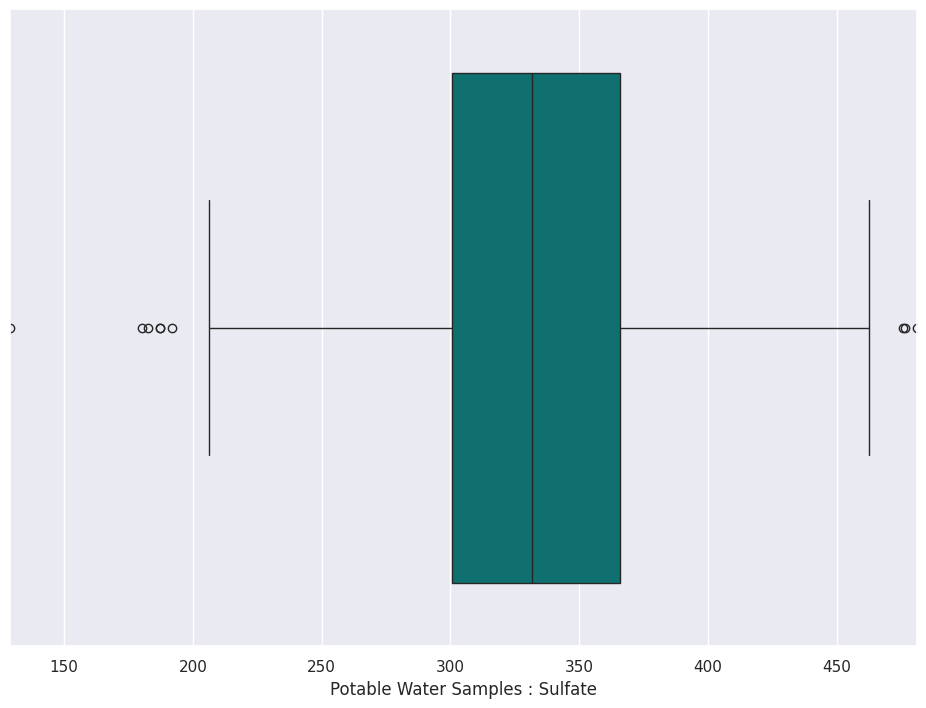

In [173]:
boxxer_plot = sns.boxplot(x = 'Sulfate', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (129.0000, 481.0306))
boxxer_plot.set(xlabel = "Potable Water Samples : Sulfate")

# How Many Outliers in Sulfate Column?

In [174]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Sulfate'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Conductivity

# Distribution of rows in terms of Conductivity

[(181.4838, 753.3426)]

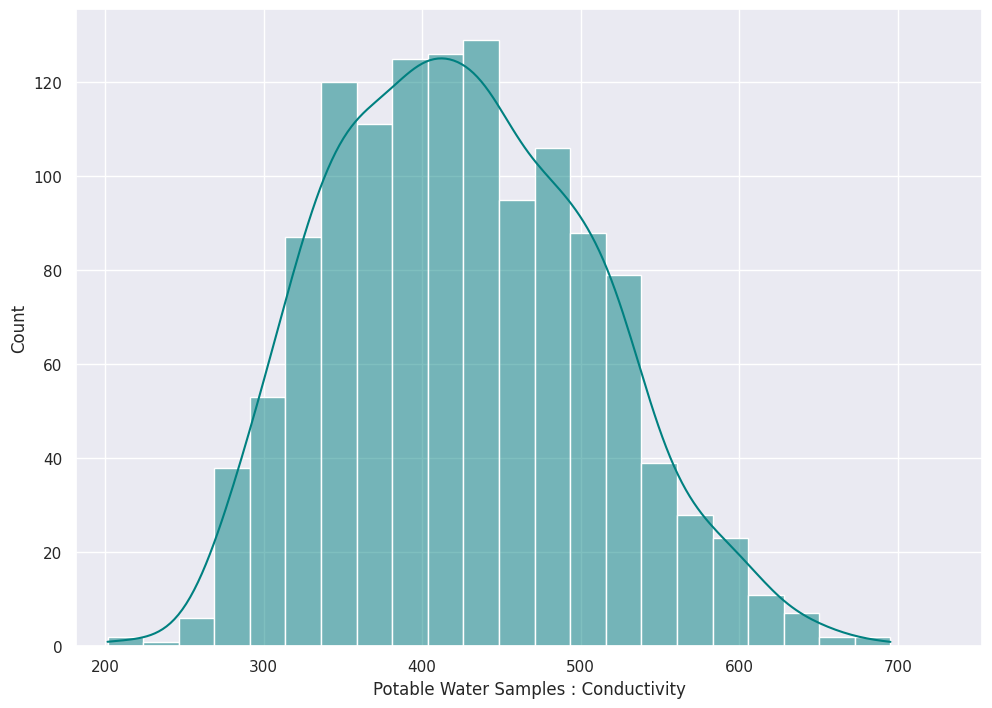

In [175]:
count_plotted = sns.histplot(x = 'Conductivity', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Conductivity")
count_plotted.set(xlim = (181.4838, 753.3426))

# Outliers : Conductivity

[Text(0.5, 0, 'Potable Water Samples : Conductivity')]

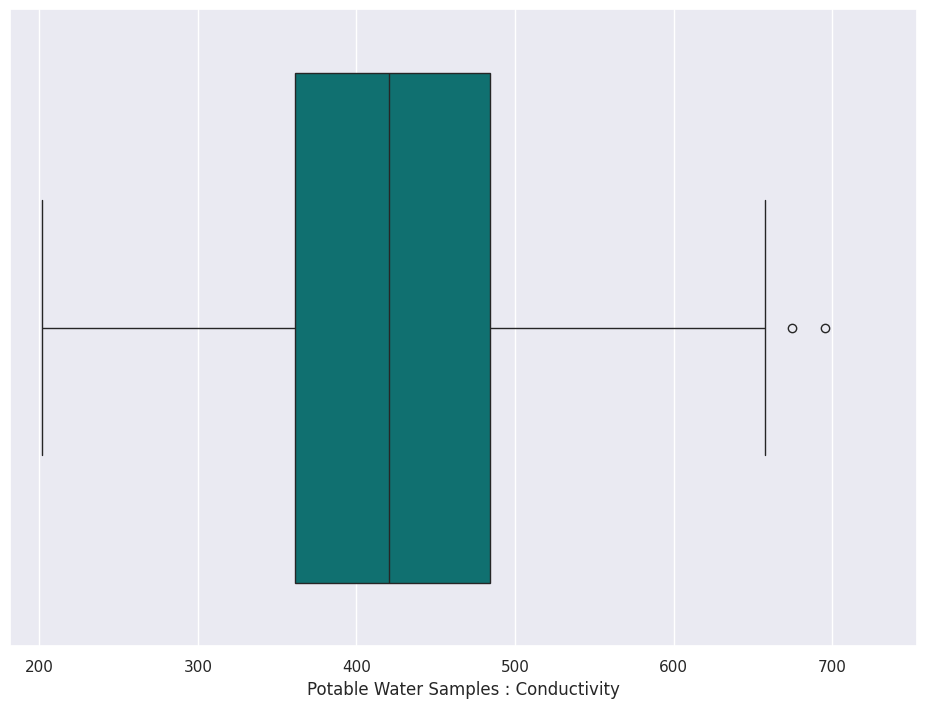

In [176]:
boxxer_plot = sns.boxplot(x = 'Conductivity', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (181.4838, 753.3426))
boxxer_plot.set(xlabel = "Potable Water Samples : Conductivity")

# How Many Outliers in Conductivity Column?

In [177]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Conductivity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 176.1137 or greater than 668.9812
There are 2 outliers.


# Column : Organic Carbon

# Distribution of rows in terms of Organic Carbon

[(-26.1, 24.674512873397326)]

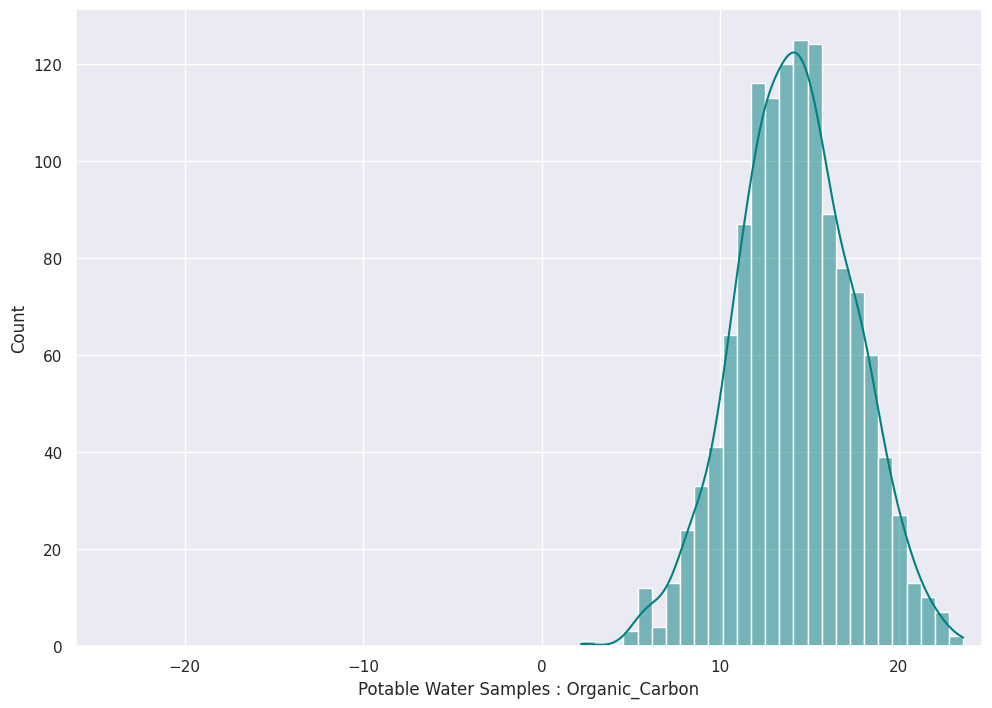

In [178]:
count_plotted = sns.histplot(x = 'Organic_carbon', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Organic_Carbon")
count_plotted.set(xlim = (2.2000 - 28.3000))

# Outliers : Organic Carbon

[Text(0.5, 0, 'Potable Water Samples : Organic_Carbon')]

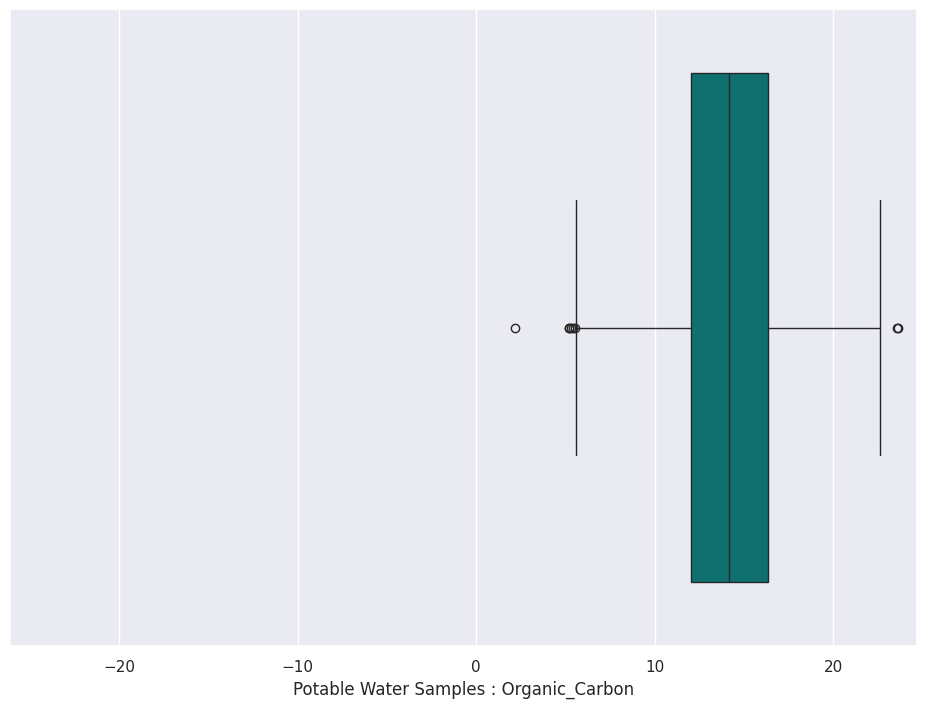

In [179]:
boxxer_plot = sns.boxplot(x = 'Organic_carbon', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (2.2000 - 28.3000))
boxxer_plot.set(xlabel = 'Potable Water Samples : Organic_Carbon')

# How Many Outliers in Organic Carbon Column?

In [180]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Organic_carbon'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 5.5504 or greater than 22.8398
There are 8 outliers.


# Column : Trihalomethanes

# Distribution of rows in terms of Trihalomethanes

[(-123.262, 129.79120618078628)]

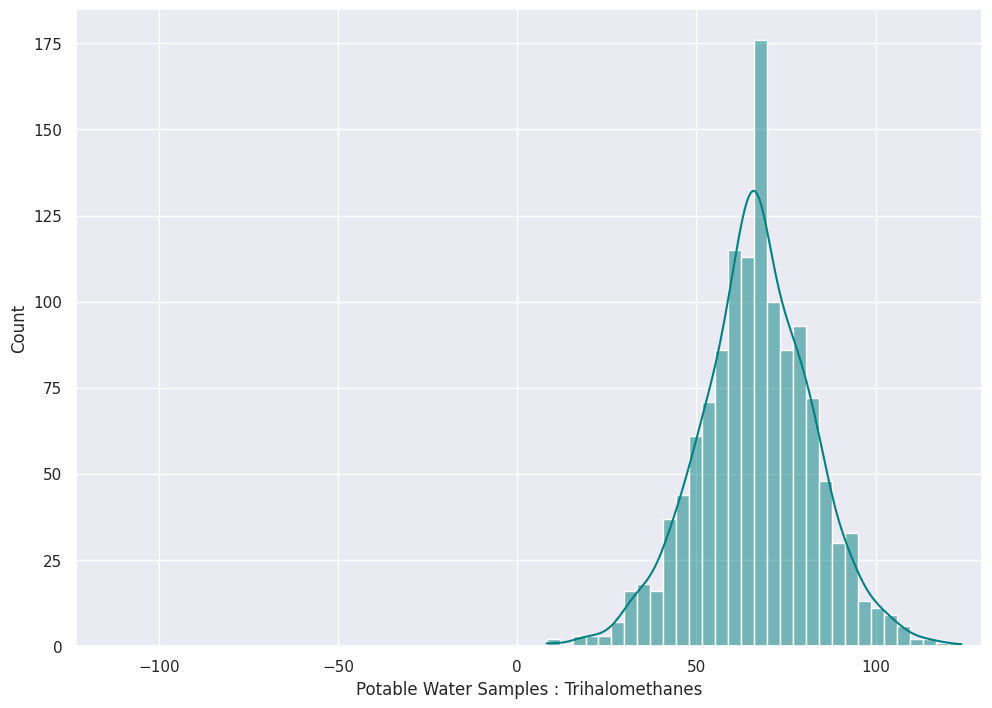

In [181]:
count_plotted = sns.histplot(x = 'Trihalomethanes', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Trihalomethanes")
count_plotted.set(xlim = (0.7380 - 124.0000))

# Outliers : Trihalomethanes

[Text(0.5, 0, 'Potable Water Samples : Trihalomethanes')]

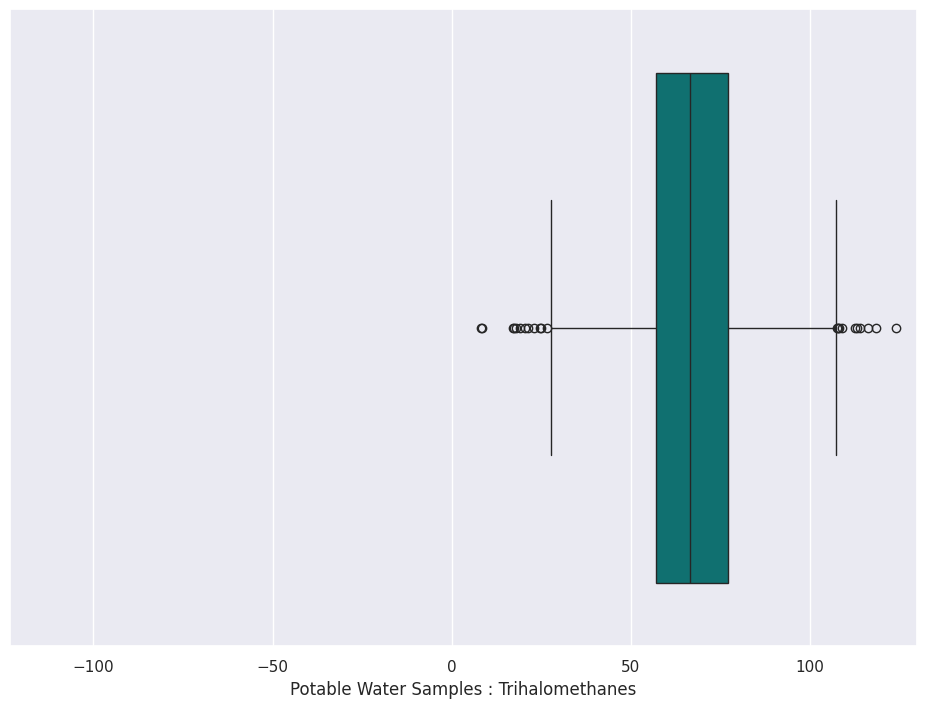

In [182]:
boxxer_plot = sns.boxplot(x = 'Trihalomethanes', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (0.7380 - 124.0000))
boxxer_plot.set(xlabel = 'Potable Water Samples : Trihalomethanes')

# How Many Outliers in Trihalomethanes Column?

In [183]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Trihalomethanes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 26.6768 or greater than 107.3019
There are 22 outliers.


# Column : Turbidity

# Distribution of rows in terms of Turbidity

[(-5.289, 6.744351610081433)]

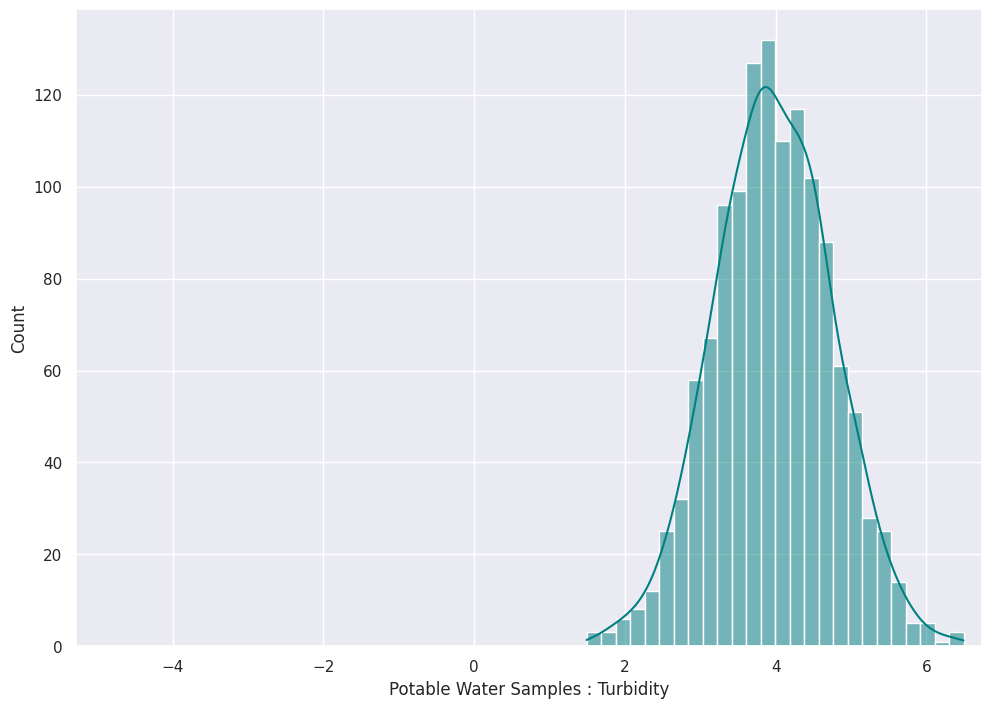

In [184]:
count_plotted = sns.histplot(x = 'Turbidity', data = dataframed.loc[dataframed['Potability'] == 1], kde = True, color = 'teal')
count_plotted.set(xlabel = "Potable Water Samples : Turbidity")
count_plotted.set(xlim = (1.4500 - 6.7390))

# Outliers : Turbidity

[Text(0.5, 0, 'Potable Water Samples : Turbidity')]

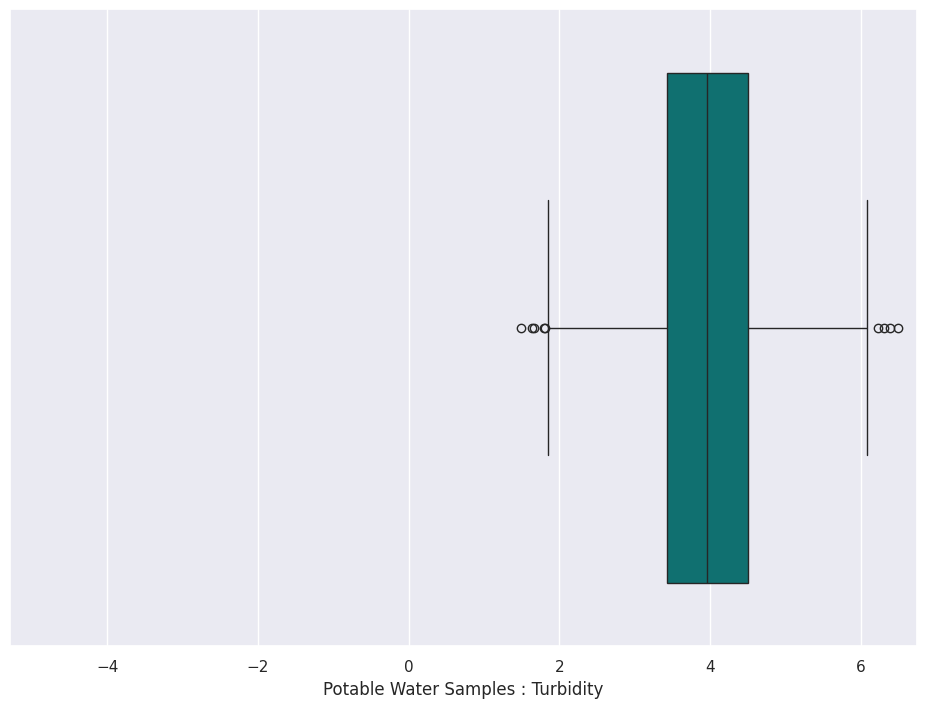

In [185]:
boxxer_plot = sns.boxplot(x = 'Turbidity', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlim = (1.4500 - 6.7390))
boxxer_plot.set(xlabel = 'Potable Water Samples : Turbidity')

# How Many Outliers in Turbidity Column?

In [186]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 1]['Turbidity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 1.8129 or greater than 6.1276
There are 9 outliers.


# Types of Rows : Not Potable Water Samples

# Column : PH Level

# Distribution of rows in terms of PH Level

[(0.0, 14.0)]

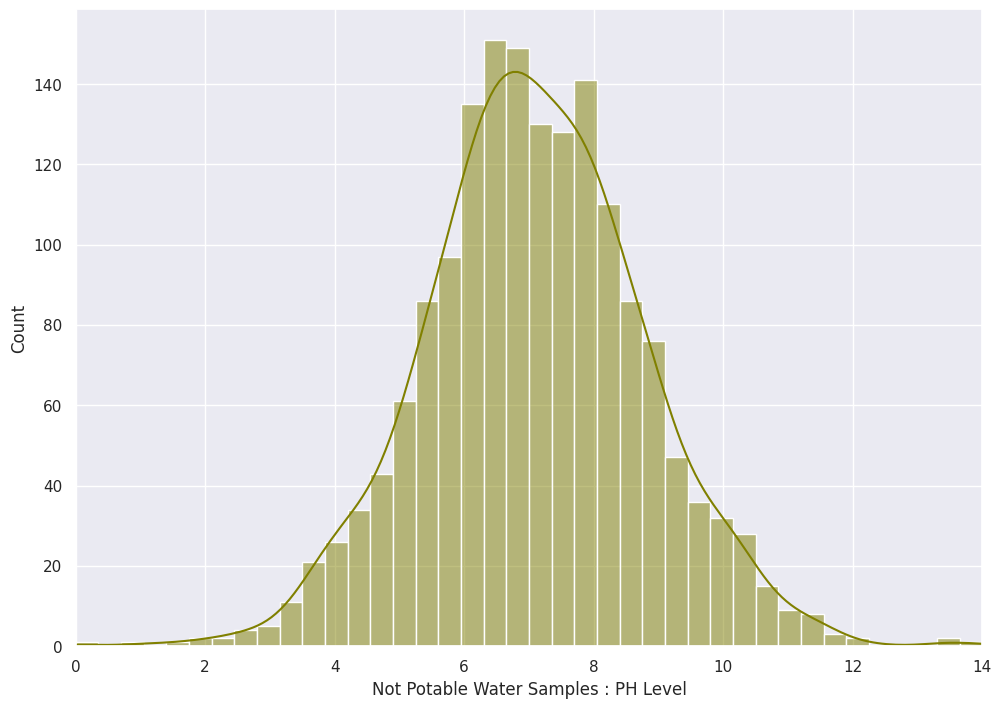

In [187]:
count_plotted = sns.histplot(x = 'ph', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : PH Level")
count_plotted.set(xlim = (0.0000, 14.0000))

# Outliers : PH Level

[Text(0.5, 0, 'Not Potable Water Samples : PH Level')]

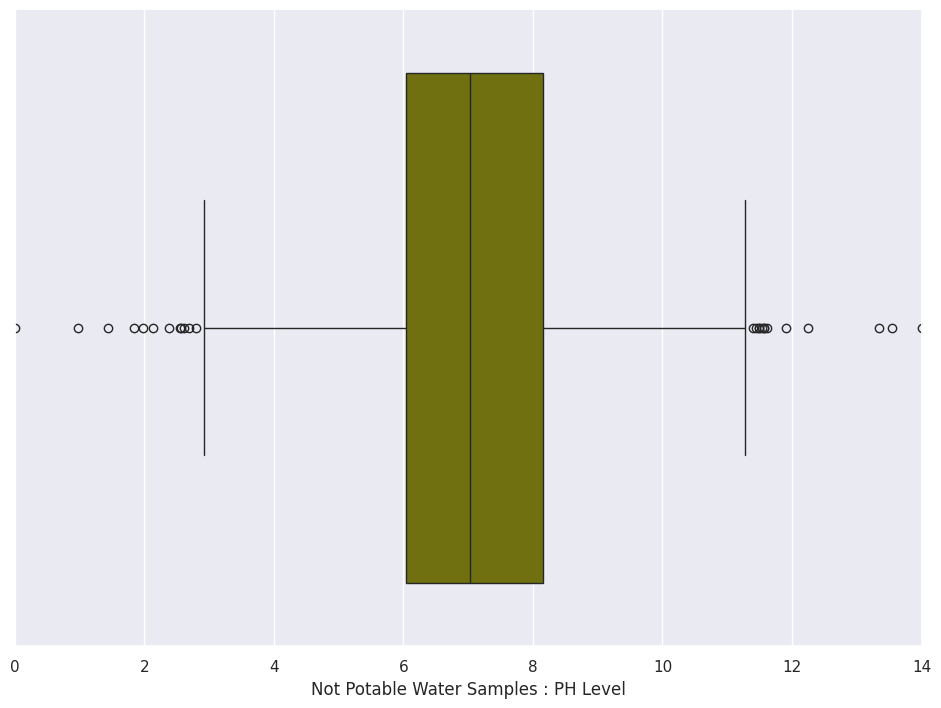

In [188]:
boxxer_plot = sns.boxplot(x = 'ph', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (0.0000, 14.0000))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : PH Level')

# How Many Outliers in PH Level Column?

In [189]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['ph'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Hardness

# Distribution of rows in terms of Hardness

[(47.432, 323.124)]

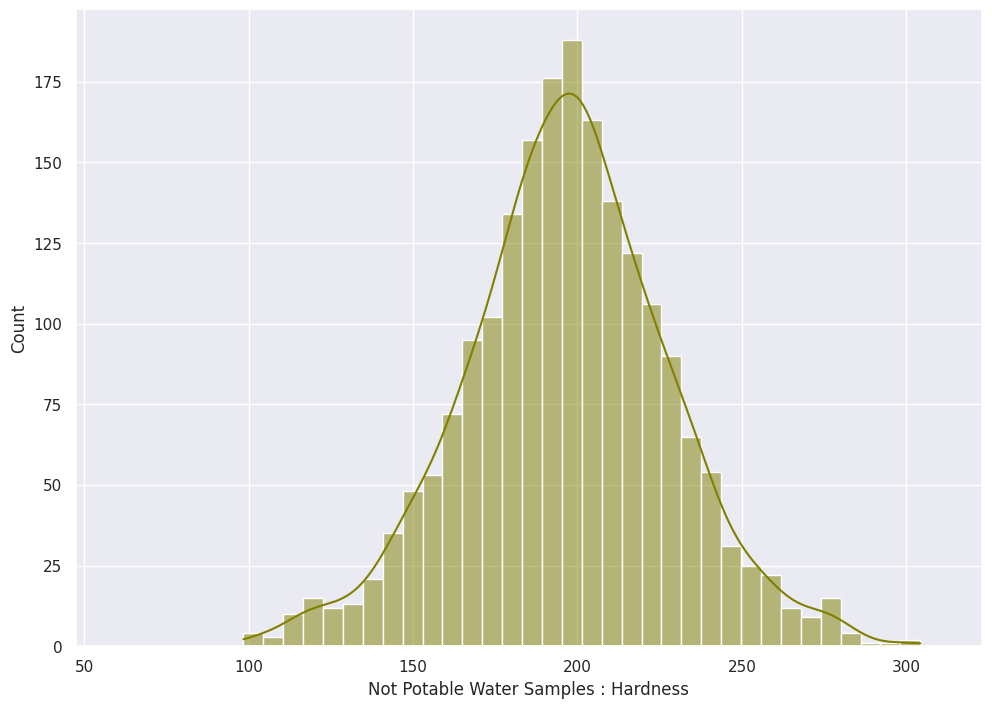

In [190]:
count_plotted = sns.histplot(x = 'Hardness', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Hardness")
count_plotted.set(xlim = (47.4320, 323.1240))

# Outliers : Hardness

[Text(0.5, 0, 'Not Potable Water Samples : Hardness')]

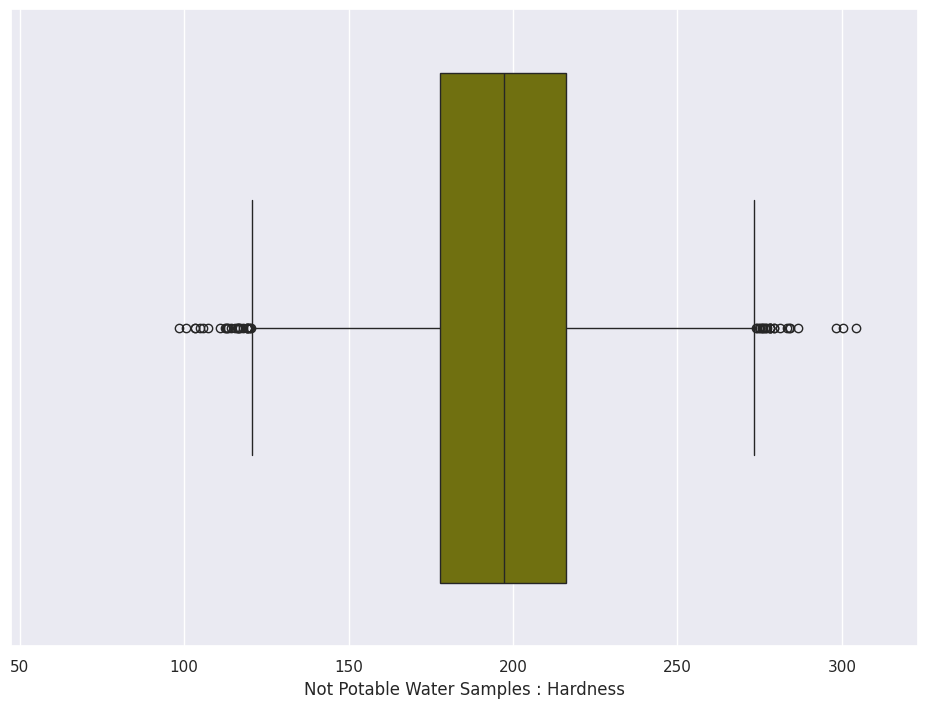

In [191]:
boxxer_plot = sns.boxplot(x = 'Hardness', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (47.4320, 323.1240))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Hardness')

# How Many Outliers in Hardness Column?

In [192]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Hardness'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 120.3771 or greater than 273.5668
There are 51 outliers.


# Column : Solids (Total dissolved solids - TDS)

# Distribution of rows in terms of Solids

[(320.9426, 61227.196)]

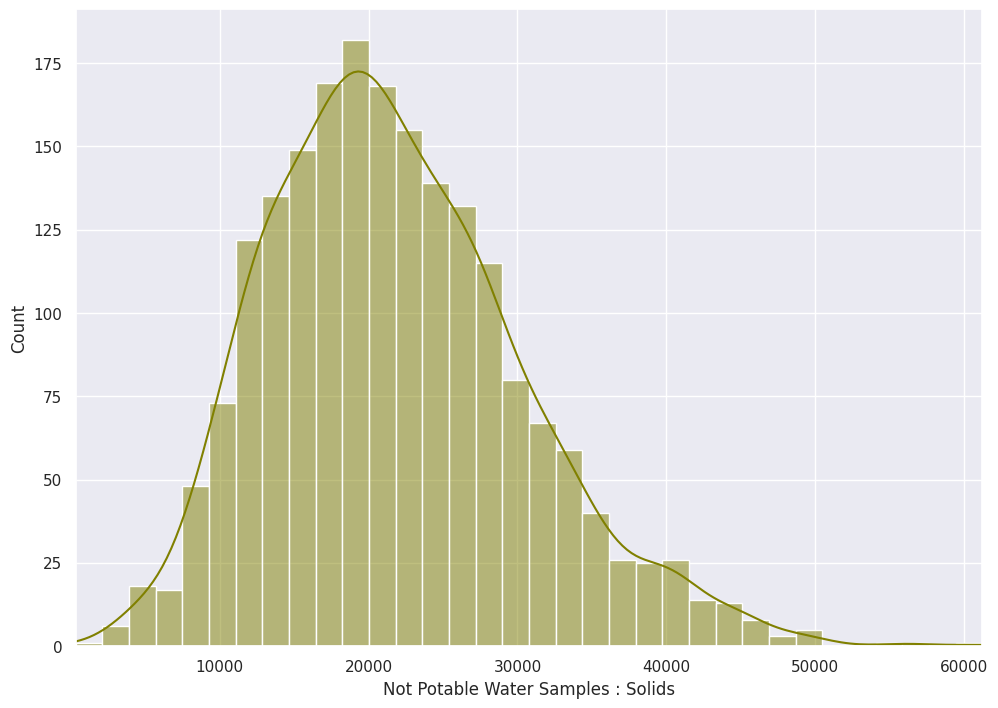

In [193]:
count_plotted = sns.histplot(x = 'Solids', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Solids")
count_plotted.set(xlim = (320.9426, 61227.1960))

# Outliers : Solids

[(320.9426, 61227.196)]

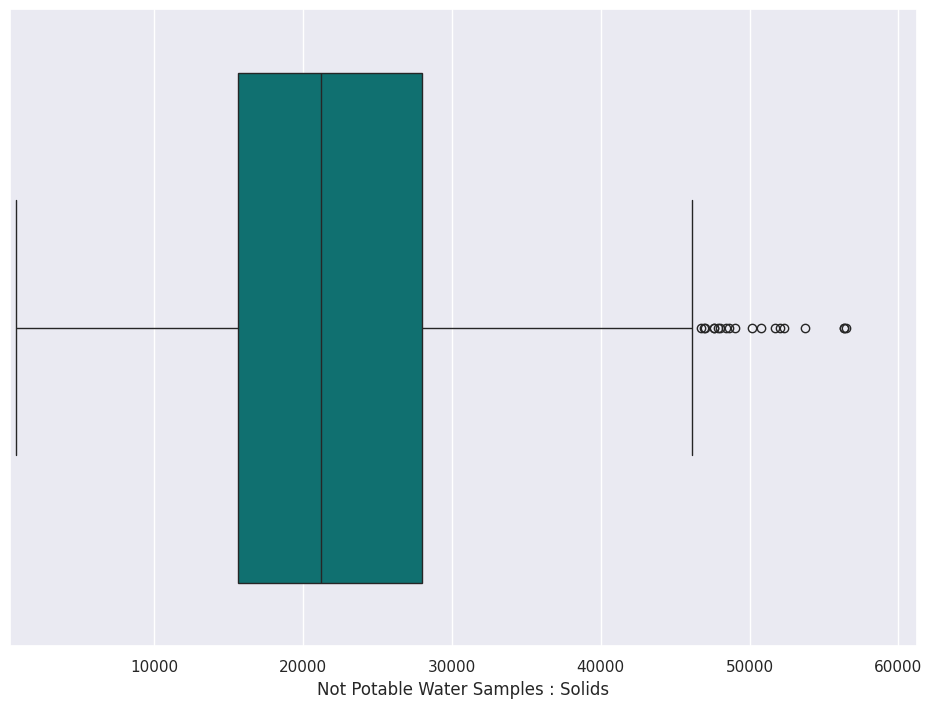

In [194]:
boxxer_plot = sns.boxplot(x = 'Solids', data = dataframed.loc[dataframed['Potability'] == 1], color = 'teal')
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Solids')
boxxer_plot.set(xlim = (320.9426, 61227.1960))

# How Many Outliers in Solids Column?

In [195]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Solids'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are greater than 44021.0365
There are 29 outliers.


# Column : Chloramines

# Distribution of rows in terms of Chloramines

[(0.352, 13.127)]

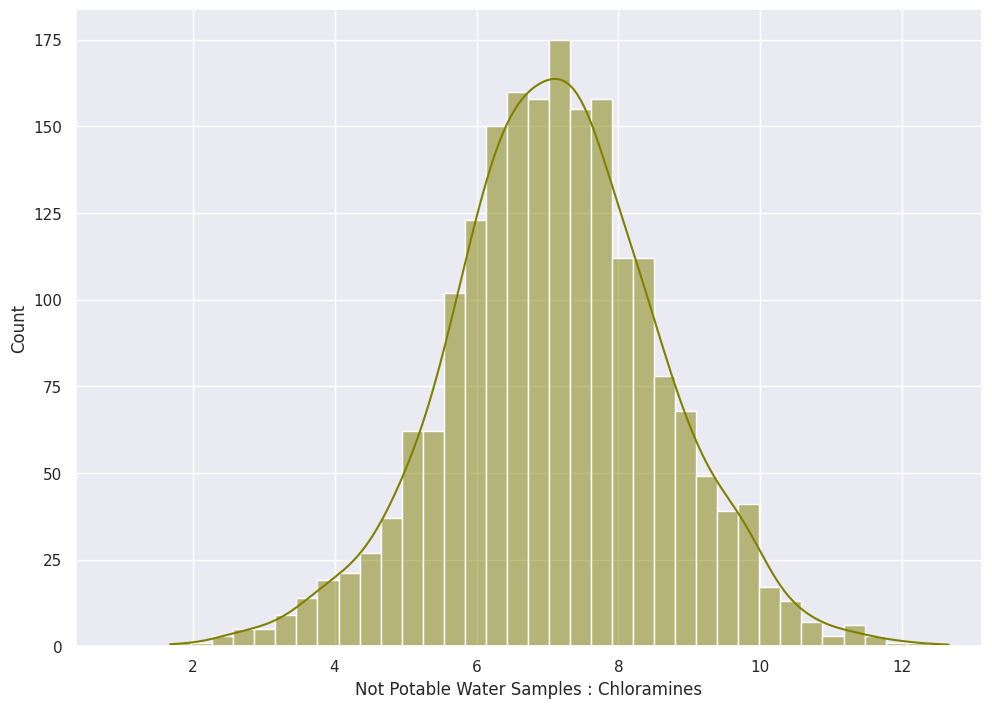

In [196]:
count_plotted = sns.histplot(x = 'Chloramines', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Chloramines")
count_plotted.set(xlim = (0.3520, 13.1270))

# Outliers : Chloramines

[Text(0.5, 0, 'Not Potable Water Samples : Chloramines')]

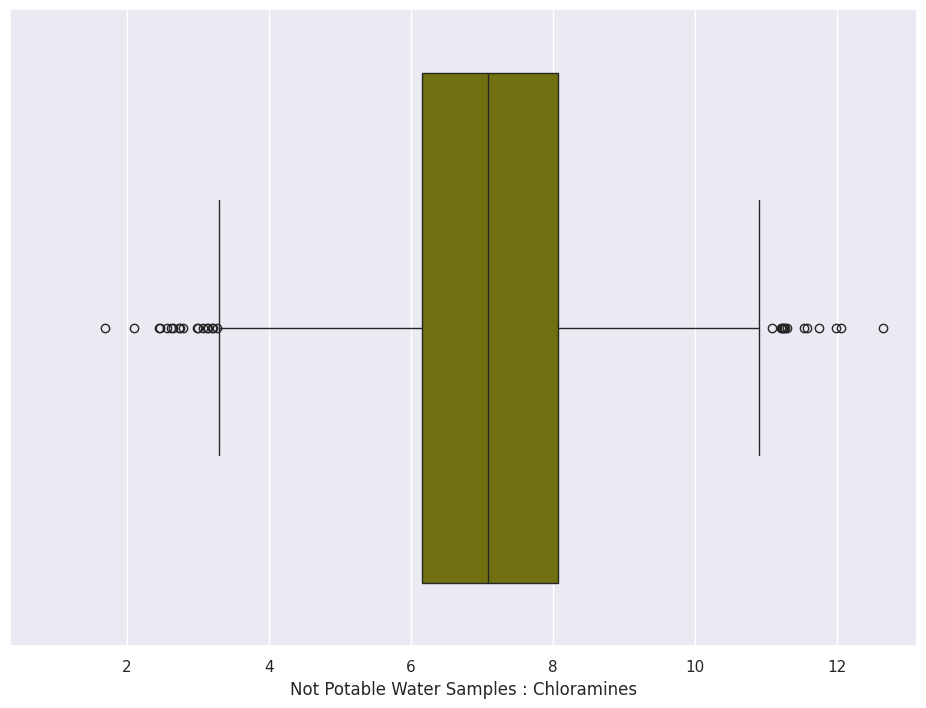

In [197]:
boxxer_plot = sns.boxplot(x = 'Chloramines', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (0.3520, 13.1270))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Chloramines')

# How Many Outliers in Chloramines Column?

In [198]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Chloramines'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 3.2894 or greater than 10.9327
There are 31 outliers.


# Column : Sulfate

# Distribution of rows in terms of Sulfate

[(129.0, 481.0306)]

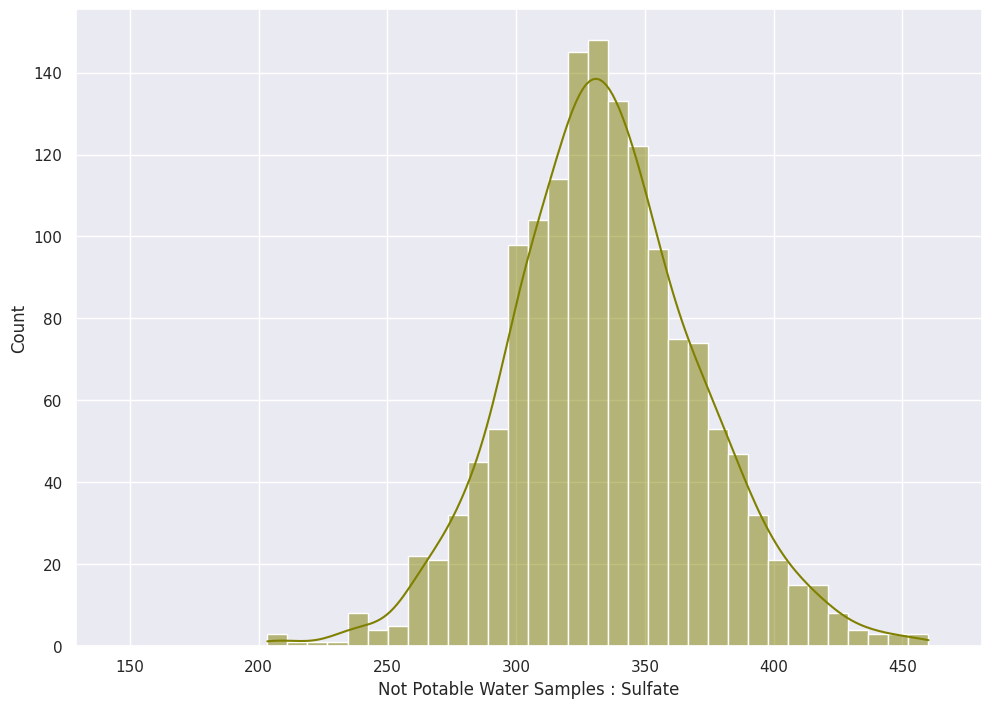

In [199]:
count_plotted = sns.histplot(x = 'Sulfate', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Sulfate")
count_plotted.set(xlim = (129.0000, 481.0306))

# Outliers : Sulfate

[Text(0.5, 0, 'Not Potable Water Samples : Sulfate')]

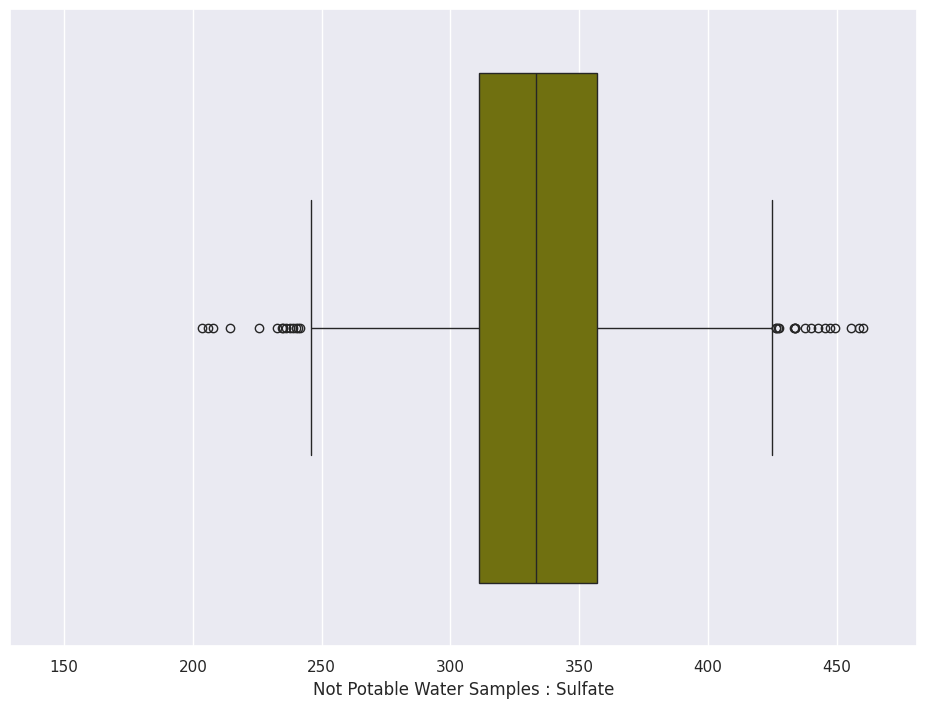

In [200]:
boxxer_plot = sns.boxplot(x = 'Sulfate', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (129.0000, 481.0306))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Sulfate')

# How Many Outliers in Sulfate Column?

In [201]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Sulfate'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than nan or greater than nan
There are 0 outliers.


# Column : Conductivity

# Distribution of rows in terms of Conductivity

[(181.4838, 753.3426)]

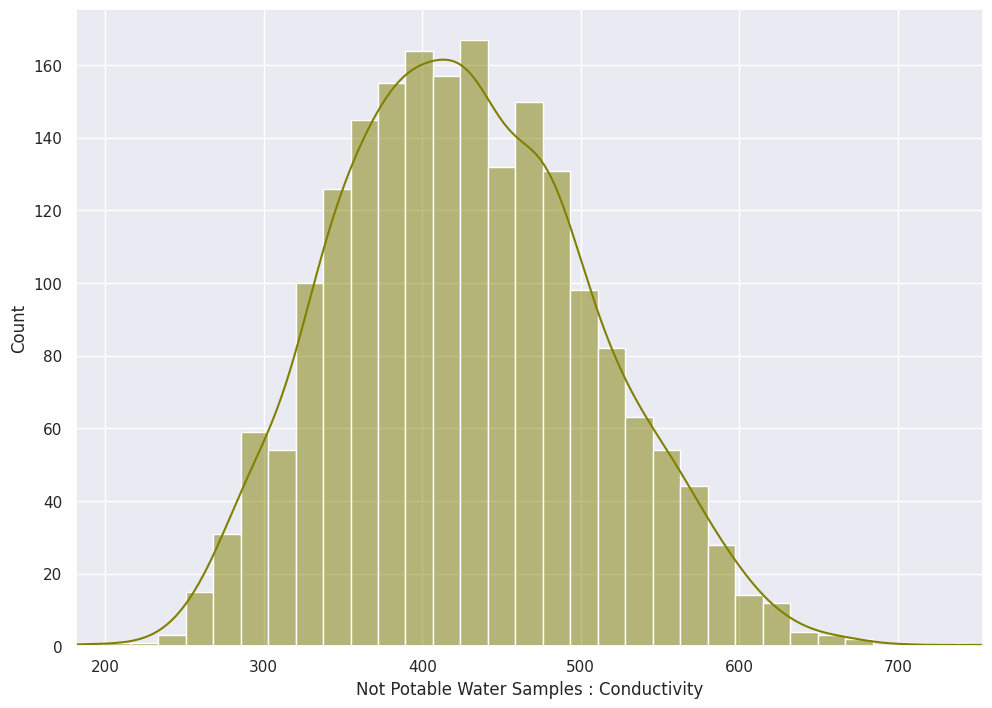

In [202]:
count_plotted = sns.histplot(x = 'Conductivity', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Conductivity")
count_plotted.set(xlim = (181.4838, 753.3426))

# Outliers : Conductivity

[Text(0.5, 0, 'Not Potable Water Samples : Conductivity')]

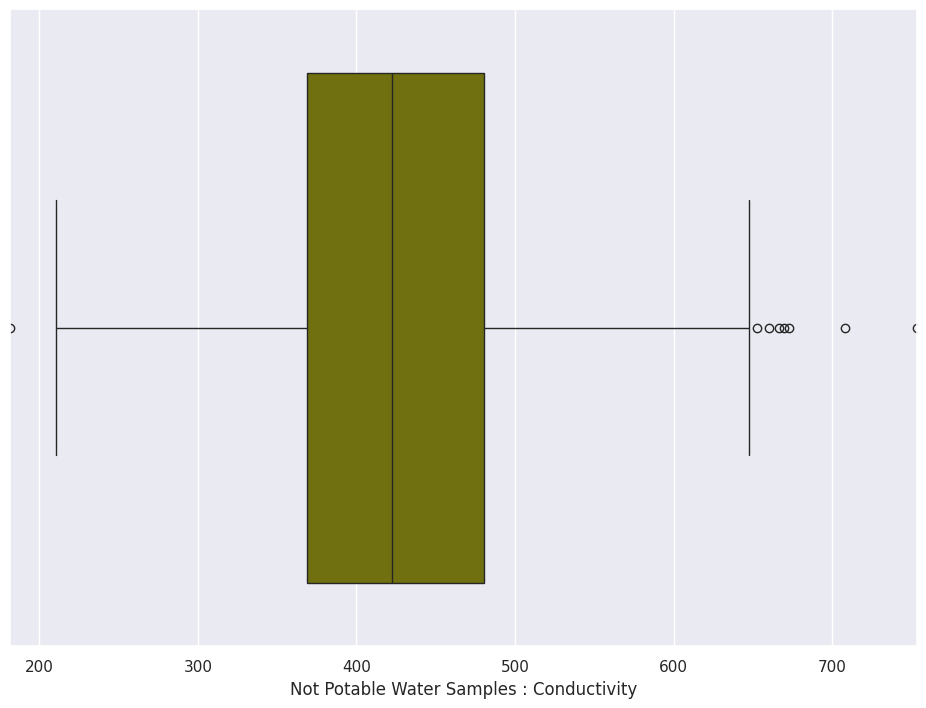

In [203]:
boxxer_plot = sns.boxplot(x = 'Conductivity', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (181.4838, 753.3426))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Conductivity')

# How Many Outliers in Conductivity Column?

In [204]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Conductivity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 200.2305 or greater than 648.9452
There are 8 outliers.


# Column : Organic Carbon

# Distribution of rows in terms of Organic Carbon

[(-26.1, 29.496405069577953)]

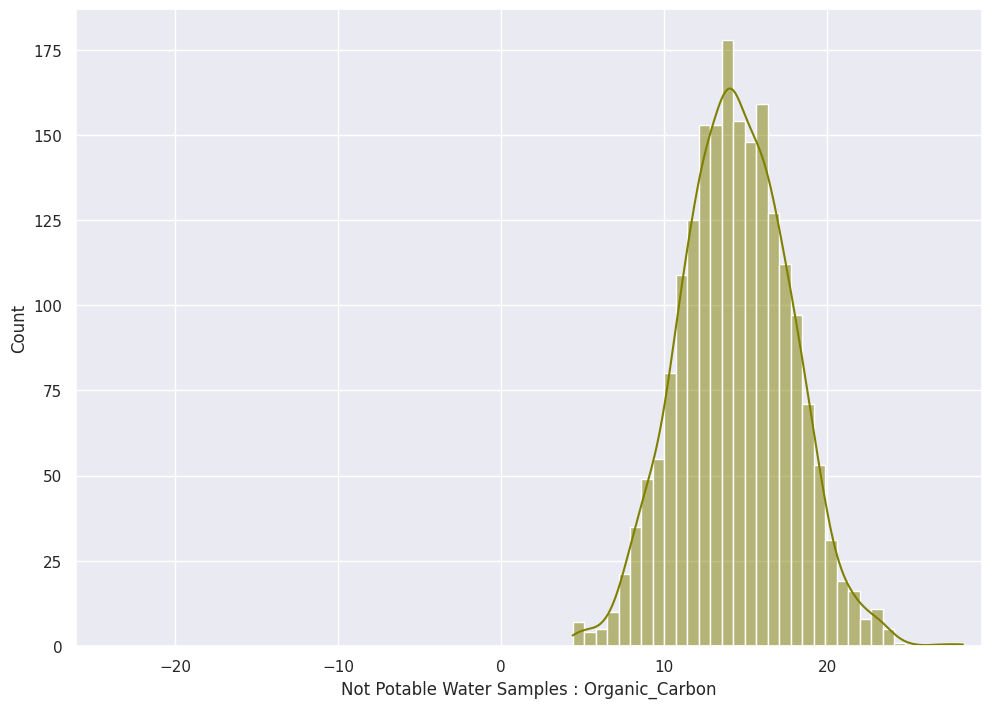

In [205]:
count_plotted = sns.histplot(x = 'Organic_carbon', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Organic_Carbon")
count_plotted.set(xlim = (2.2000 - 28.3000))

# Outliers : Organic Carbon

[Text(0.5, 0, 'Not Potable Water Samples : Organic_Carbon')]

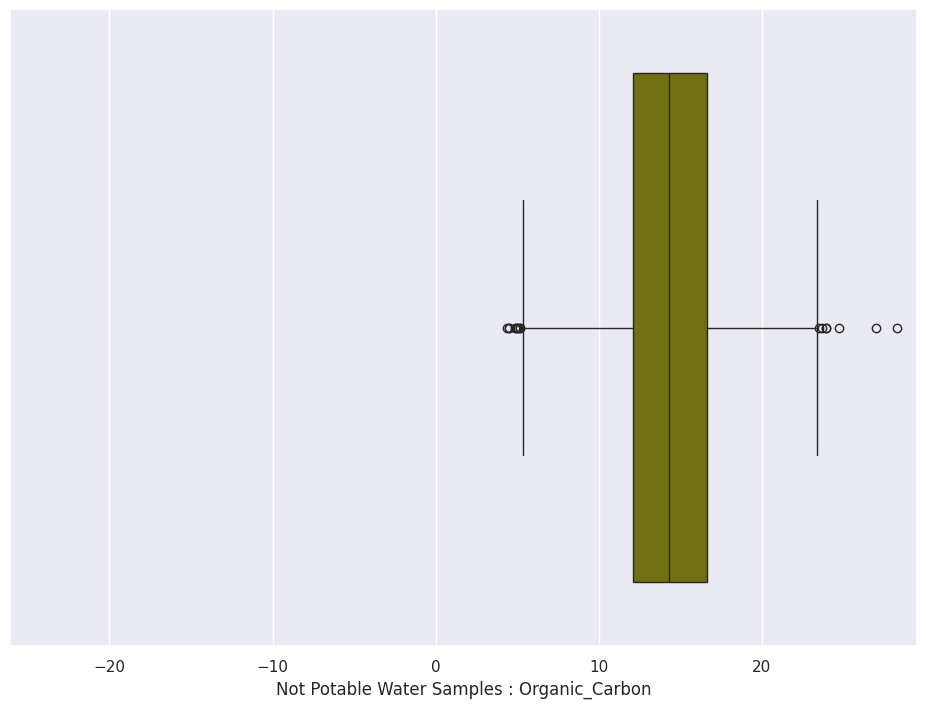

In [206]:
boxxer_plot = sns.boxplot(x = 'Organic_carbon', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (2.2000 - 28.3000))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Organic_Carbon')

# How Many Outliers in Organic Carbon Column?

In [207]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Organic_carbon'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 5.2784 or greater than 23.4721
There are 16 outliers.


# Column : Trihalomethanes

# Distribution of rows in terms of Trihalomethanes

[(-123.262, 125.9946808555721)]

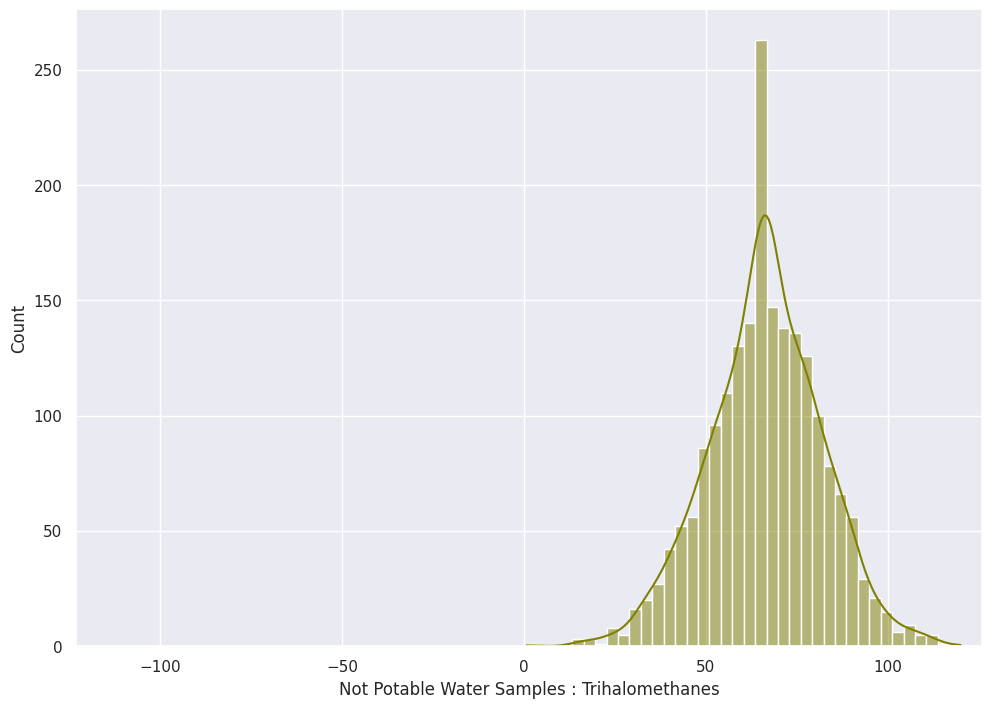

In [208]:
count_plotted = sns.histplot(x = 'Trihalomethanes', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Trihalomethanes")
count_plotted.set(xlim = (0.7380 - 124.0000))

# Outliers : Trihalomethanes

[Text(0.5, 0, 'Not Potable Water Samples : Trihalomethanes')]

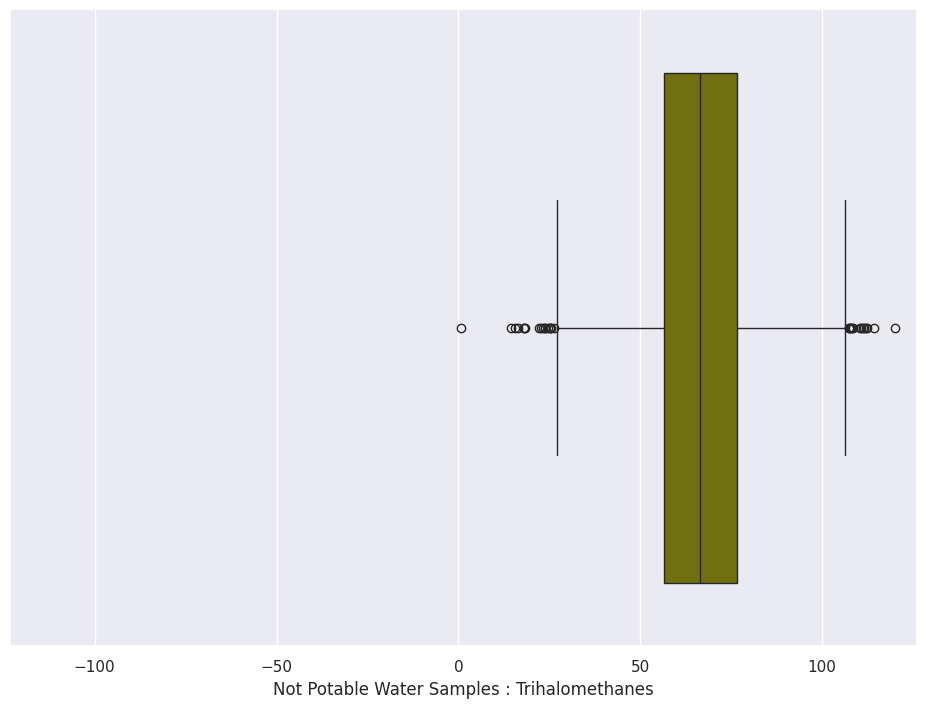

In [209]:
boxxer_plot = sns.boxplot(x = 'Trihalomethanes', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (0.7380 - 124.0000))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Trihalomethanes')

# How Many Outliers in Trihalomethanes Column?

In [210]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Trihalomethanes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 26.3263 or greater than 106.6344
There are 31 outliers.


# Column : Turbidity

# Distribution of rows in terms of Turbidity

[(-5.289, 7.00345)]

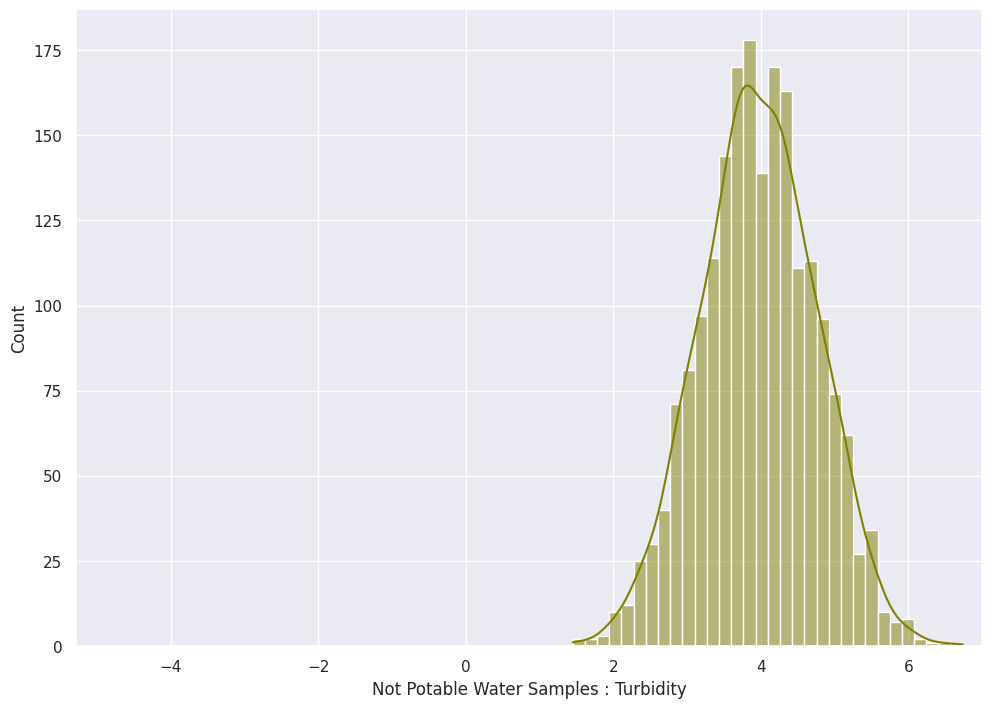

In [211]:
count_plotted = sns.histplot(x = 'Turbidity', data = dataframed.loc[dataframed['Potability'] == 0], kde = True, color = 'olive')
count_plotted.set(xlabel = "Not Potable Water Samples : Turbidity")
count_plotted.set(xlim = (1.4500 - 6.7390))

# Outliers : Turbidity

[Text(0.5, 0, 'Not Potable Water Samples : Turbidity')]

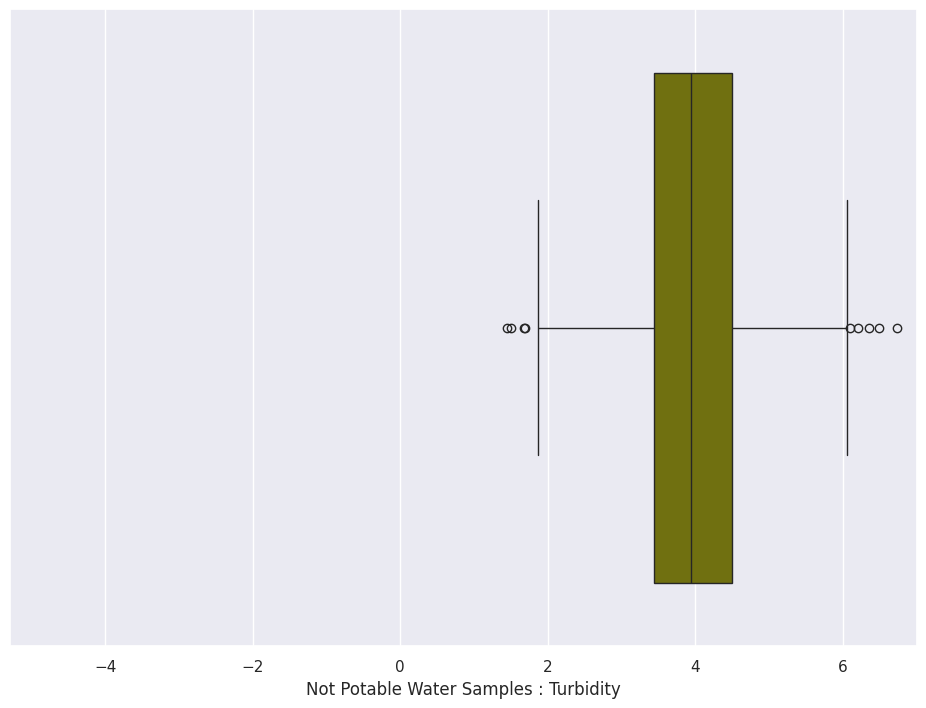

In [212]:
boxxer_plot = sns.boxplot(x = 'Turbidity', data = dataframed.loc[dataframed['Potability'] == 0], color = 'olive')
boxxer_plot.set(xlim = (1.4500 - 6.7390))
boxxer_plot.set(xlabel = 'Not Potable Water Samples : Turbidity')

# How Many Outliers in Turbidity Column?

In [213]:
numpy_array = np.array(dataframed.loc[dataframed['Potability'] == 0]['Turbidity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 1.8660 or greater than 6.0742
There are 9 outliers.


# Column : Potability

# Distribution of rows in terms of Potability

**Note : Y will consist of the Potability Column**

[Text(0.5, 0, 'Distribution of rows in terms of Potability')]

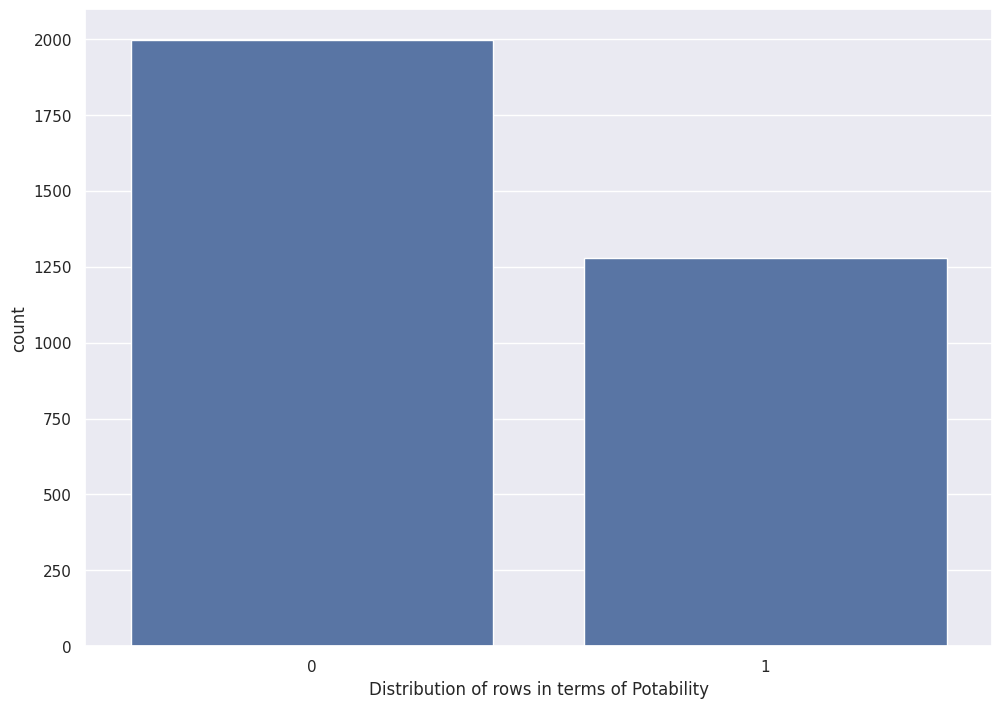

In [214]:
count_plotted = sns.countplot(x = "Potability", data = dataframed)
count_plotted.set(xlabel = "Distribution of rows in terms of Potability")
# Y will consist of the Potability Column 

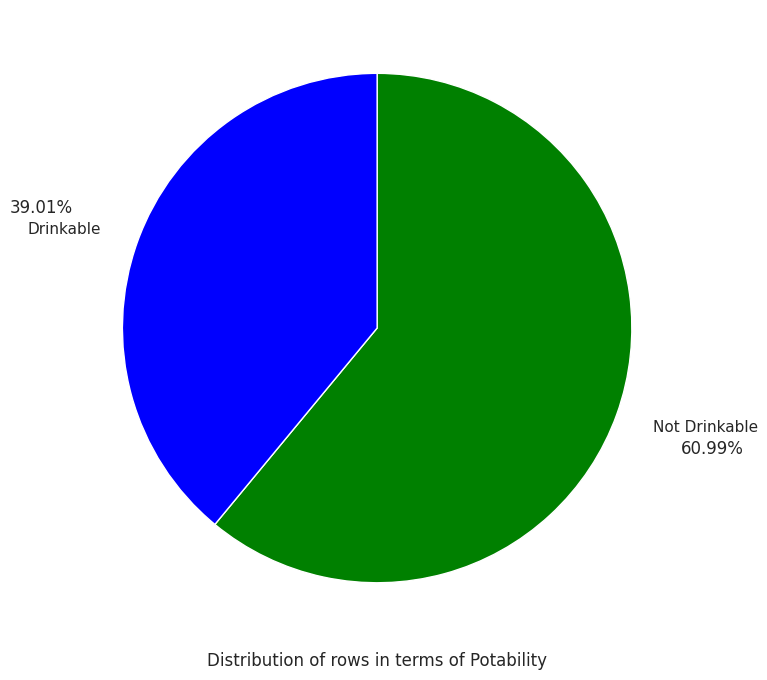

'\nNote : This is the Same thing as previous visualization\nhowever this time i used a pie chart to emphasize \nthe percentage of available rows that represent \ndrinkable water and water that is not drinkable\nin the form of percentage \n'

In [215]:
plt.pie(dataframed['Potability'].value_counts(),labels=['Not Drinkable','Drinkable'],colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=1.4,startangle=90,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.xlabel("Distribution of rows in terms of Potability")
plt.show()

'''
Note : This is the Same thing as previous visualization
however this time i used a pie chart to emphasize 
the percentage of available rows that represent 
drinkable water and water that is not drinkable
in the form of percentage 
'''

# Outliers : Potability

[(-1.0, 1.05)]

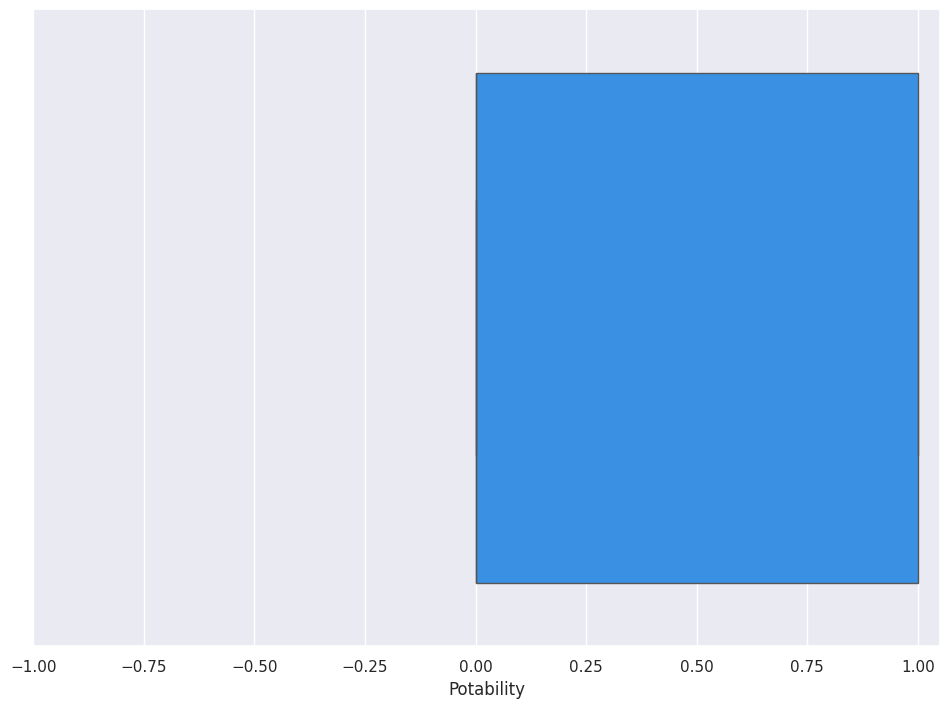

In [216]:
boxxer_plot = sns.boxplot(x = 'Potability', data = dataframed, color = 'dodgerblue')
boxxer_plot.set(xlim = (0.0000 - 1.0000))

# How Many Outliers in Potability Column?

In [217]:
numpy_array = np.array(dataframed['Potability'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


# Defining X

Should contain the following :

* PH VALUE
* HARDNESS
* SOLIDS
* CHLORAMINES
* SULFATE
* CONDUCTIVITY
* ORGANIC_CARBON
* TRIHALOMETHANES
* TURBIDITY

In [218]:
X = dataframed.iloc[:, :-1]
X.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075

# Defining y

Should contain the following :

* POTABILITY

In [219]:
y = dataframed.iloc[:, -1:]
y.head()

Potability
0           0
1           0
2           0
3           0
4           0

# Random Oversampling

In [220]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy = 1)

X_res_over, y_res_over = rus.fit_resample(X, y)

# 

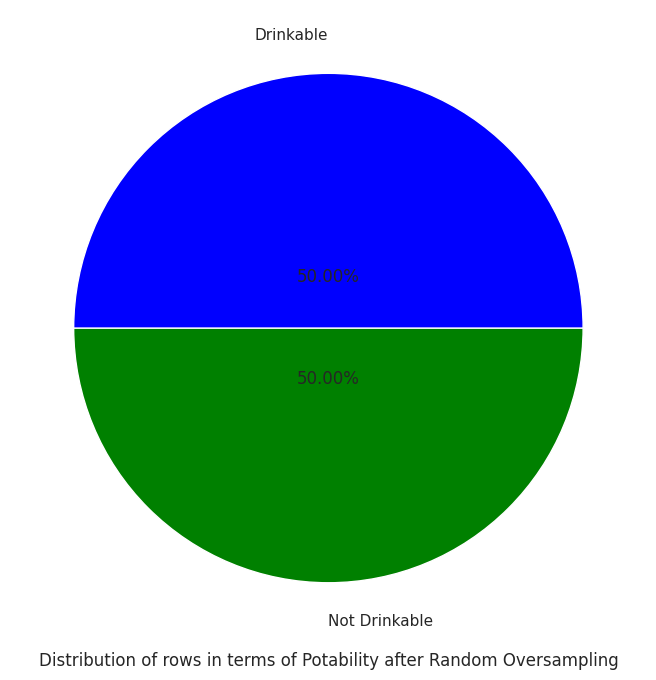

In [221]:
plt.pie(y_res_over['Potability'].value_counts(),labels=['Not Drinkable','Drinkable'],colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=0.2,startangle=0,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.xlabel("Distribution of rows in terms of Potability after Random Oversampling")
plt.show()

# Training and Testing
Supervised AL used :

* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Logistic Regression
* Support Vector Machine
* Gaussian Naive Bayes

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# Split The Data for Training and Testing Purposes

Test Sizes

* 20%
* 30%

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state = 42)

# Shape of Data (20%)

In [224]:
print('Shape of Data (20%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (3196, 9)
y_train shape :  (3196, 1)
X_test shape :  (800, 9)
y_test shape :  (800, 1)


# AL : Random Forest (20%)

![infographic_10.png](https://raw.githubusercontent.com/ALGOREX-PH/Water-Potability-Prediction/refs/heads/main/visuals/infographic_10.png)


In [242]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test) 

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Random Forest (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Random Forest (20%)


Training Model Performance Check
Accuracy Score : 0.9656
F1 Score : 0.9656
Precision Score : 0.9656
Recall Score : 0.9656


Testing Model Performance Check
Accuracy Score : 0.7362
F1 Score : 0.7363
Precision Score : 0.7363
Recall Score : 0.7362
